In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install scikit-learn==1.5.2
# !pip install xgboost

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_csv('Coupon.csv')
df.head(10)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,Carry out & Take away,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,Bar,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## Data Preprocessing

In [6]:
row,col = df.shape
print(f"The dataset has {row} rows and {col} columns.")

The dataset has 12684 rows and 25 columns.


#### checking missing values

In [8]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [9]:
# Percentage of missing values in each attributes/columns

df.isnull().sum()/len(df)*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

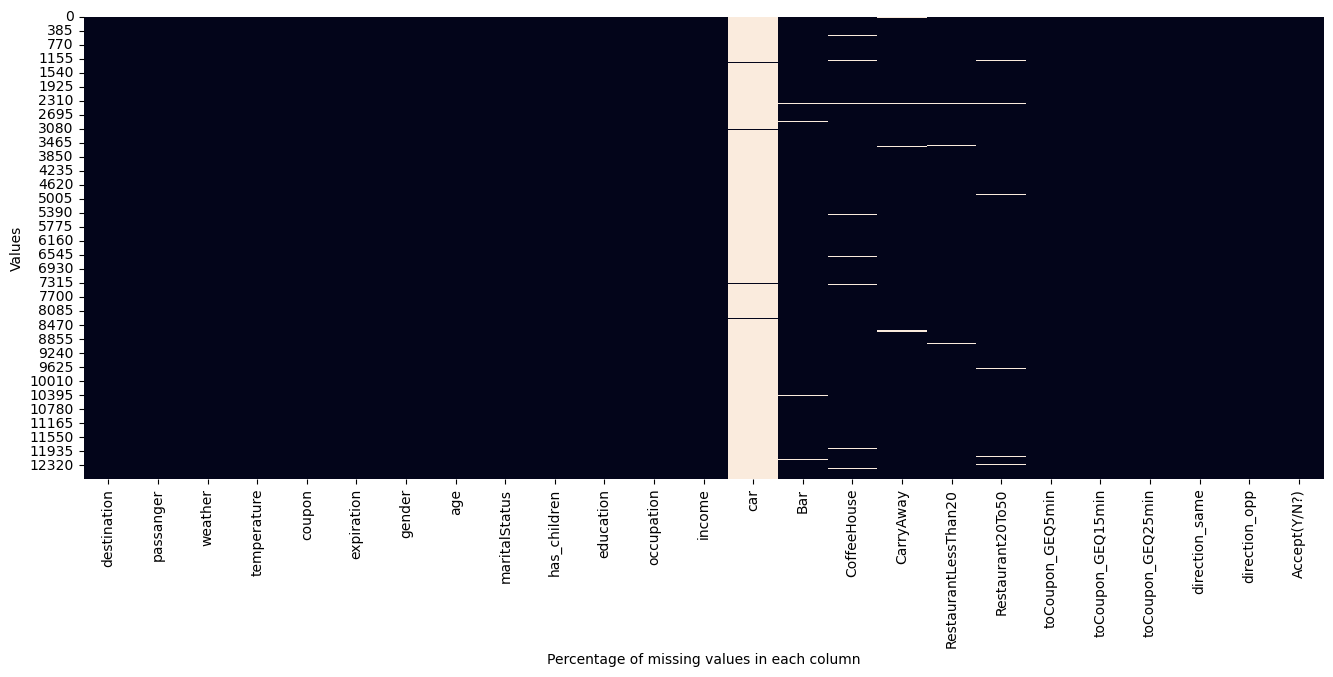

In [10]:
plt.figure(figsize = (16,6))
sns.heatmap(df.isnull(), cbar= False)
plt.xlabel("Percentage of missing values in each column")
plt.ylabel('Values')
plt.show()

#### Since the column "car" has around 99% of missing values. It's better to drop that column

In [12]:
df.drop(columns = ['car'], axis = 1, inplace = True)

In [13]:
df.shape

(12684, 24)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  Bar                   12577 non-null  object
 14  CoffeeHouse           12467 non-null  object
 15  CarryAway             12533 non-null

#### Since all the missing value columns are "object" data type so impute them with mode.

In [16]:
missing_val_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for i in missing_val_cols:
    print("*******************************")
    print(df[i].value_counts())
    print()

*******************************
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

*******************************
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

*******************************
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

*******************************
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

*******************************
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64



In [17]:
df['Bar'] = df['Bar'].fillna('never')
df['CoffeeHouse'] = df['CoffeeHouse'].fillna('less1')
df['CarryAway'] = df['CarryAway'].fillna('1~3')
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna('1~3')
df['Restaurant20To50'] = df['Restaurant20To50'].fillna('less1')

In [18]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [19]:
for col in df.columns:
    print('****************************',col,'****************************')
    #print()
    print(set(df[col].tolist()))
    print()


**************************** destination ****************************
{'Work', 'No Urgent Place', 'Home'}

**************************** passanger ****************************
{'Kid(s)', 'Alone', 'Partner', 'Friend(s)'}

**************************** weather ****************************
{'Sunny', 'Snowy', 'Rainy'}

**************************** temperature ****************************
{80, 30, 55}

**************************** coupon ****************************
{'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Bar', 'Restaurant(<20)'}

**************************** expiration ****************************
{'2h', '1d'}

**************************** gender ****************************
{'Male', 'Female'}

**************************** age ****************************
{'46', 'below21', '21', '31', '36', '41', '26', '50plus'}

**************************** maritalStatus ****************************
{'Married partner', 'Divorced', 'Widowed', 'Single', 'Unmarried partner'}

**********

#### Since 'toCoupon_GEQ5min' column has only one value, we can drop that column

In [21]:
df.drop(columns=['toCoupon_GEQ5min'], axis = 1, inplace = True)

In [22]:
i,j = df.shape
print(f"The dataset has {i} rows and {j} columns now.")

The dataset has 12684 rows and 23 columns now.


In [23]:
df.duplicated().sum()

291

In [24]:
df = df.drop_duplicates()

In [25]:
row,col = df.shape
print(f"The dataset has {row} rows and {col} columns after the removal of duplicate values.")

The dataset has 12393 rows and 23 columns after the removal of duplicate values.


In [26]:
# import dtale

# dtale.show(df)

## EDA

#### Count of coupons accepted/rejected for each features

destination
No Urgent Place    6118
Home               3161
Work               3114
Name: count, dtype: int64




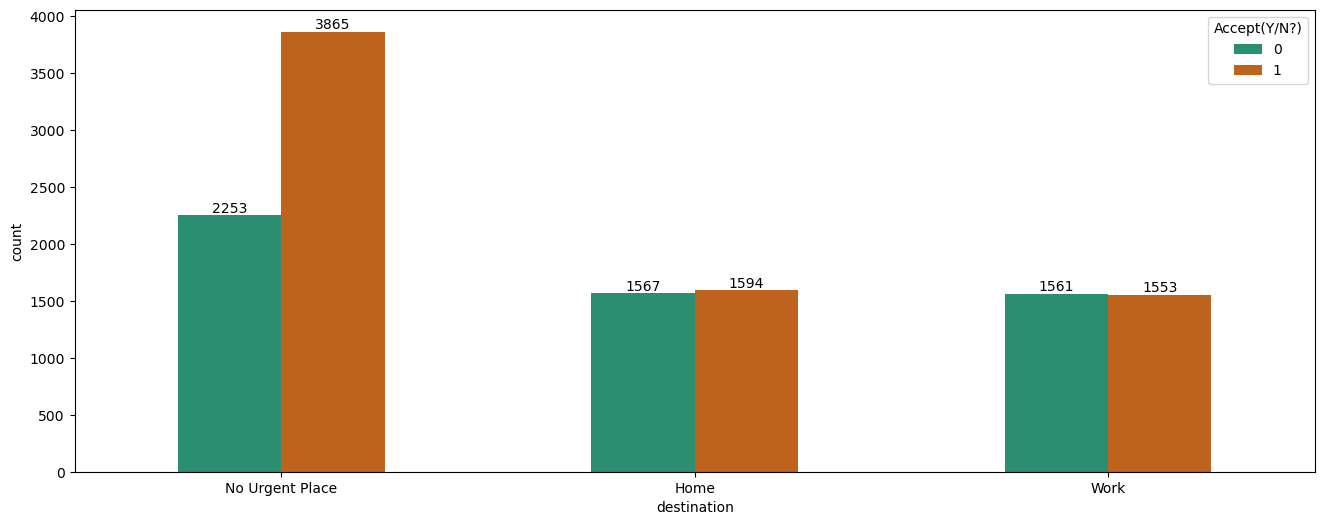

______________________________________________________________________________________________________________________________________________________
passanger
Alone        7178
Friend(s)    3166
Partner      1068
Kid(s)        981
Name: count, dtype: int64




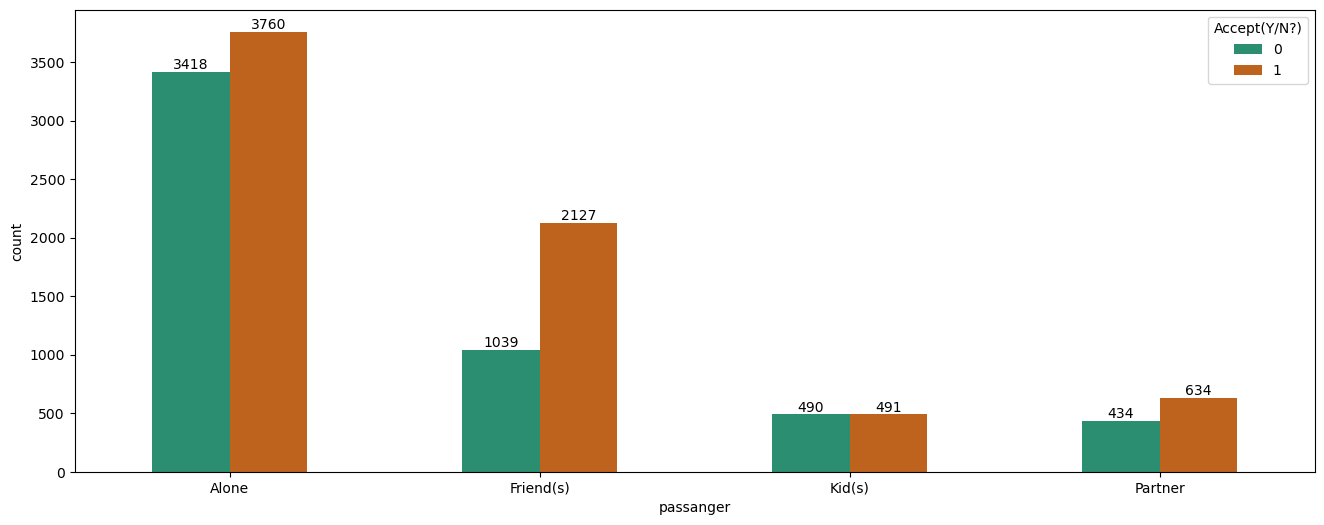

______________________________________________________________________________________________________________________________________________________
weather
Sunny    9862
Snowy    1329
Rainy    1202
Name: count, dtype: int64




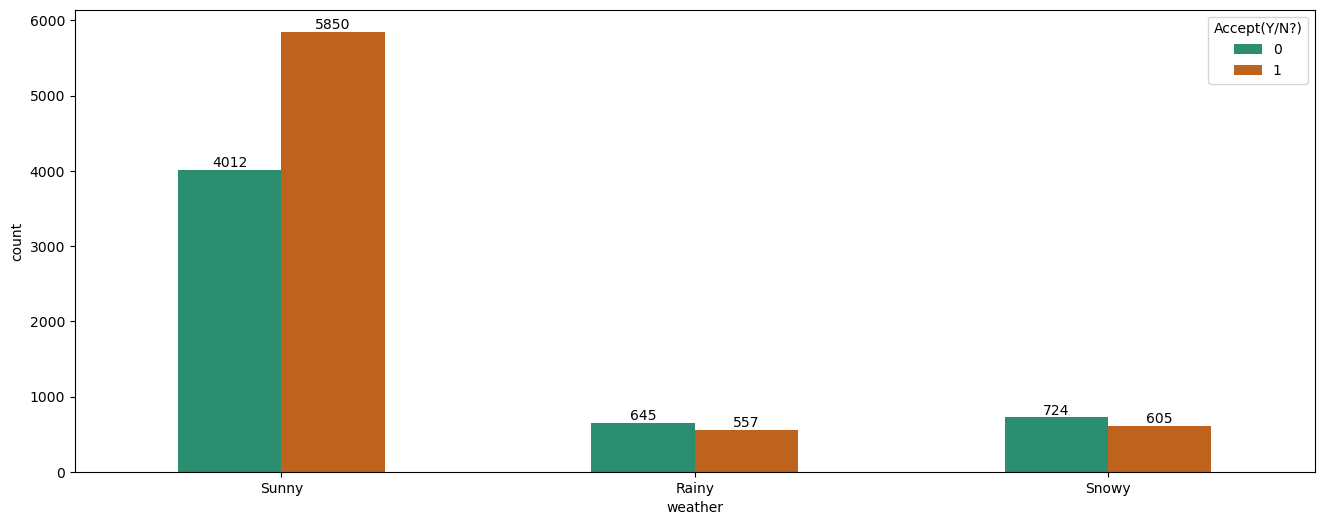

______________________________________________________________________________________________________________________________________________________
temperature
80    6328
55    3828
30    2237
Name: count, dtype: int64




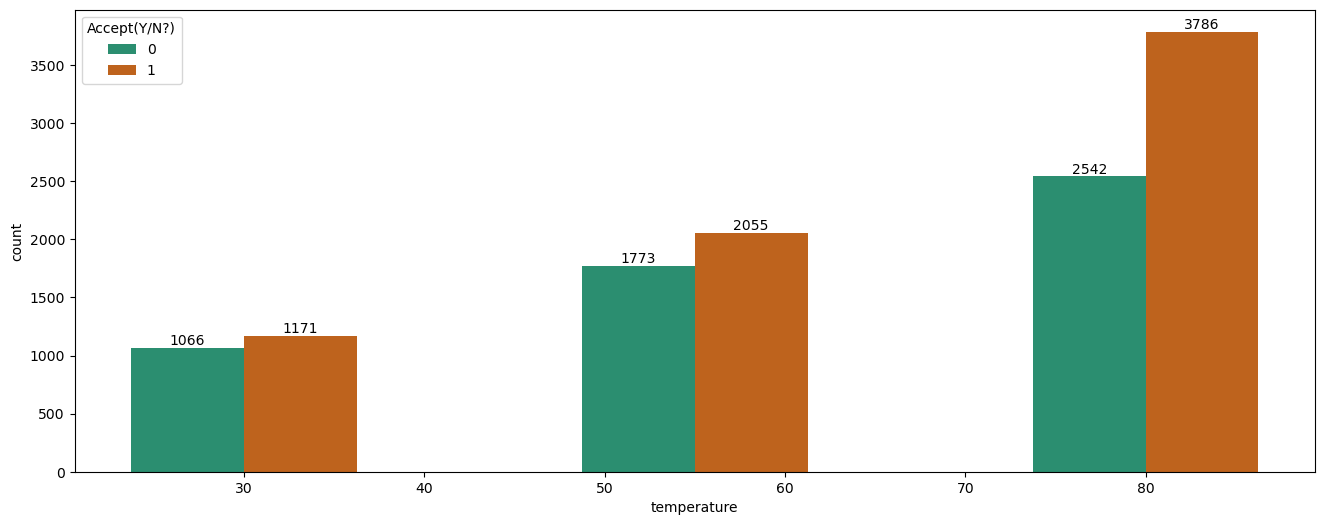

______________________________________________________________________________________________________________________________________________________
coupon
Coffee House             3913
Restaurant(<20)          2708
Carry out & Take away    2275
Bar                      2010
Restaurant(20-50)        1487
Name: count, dtype: int64




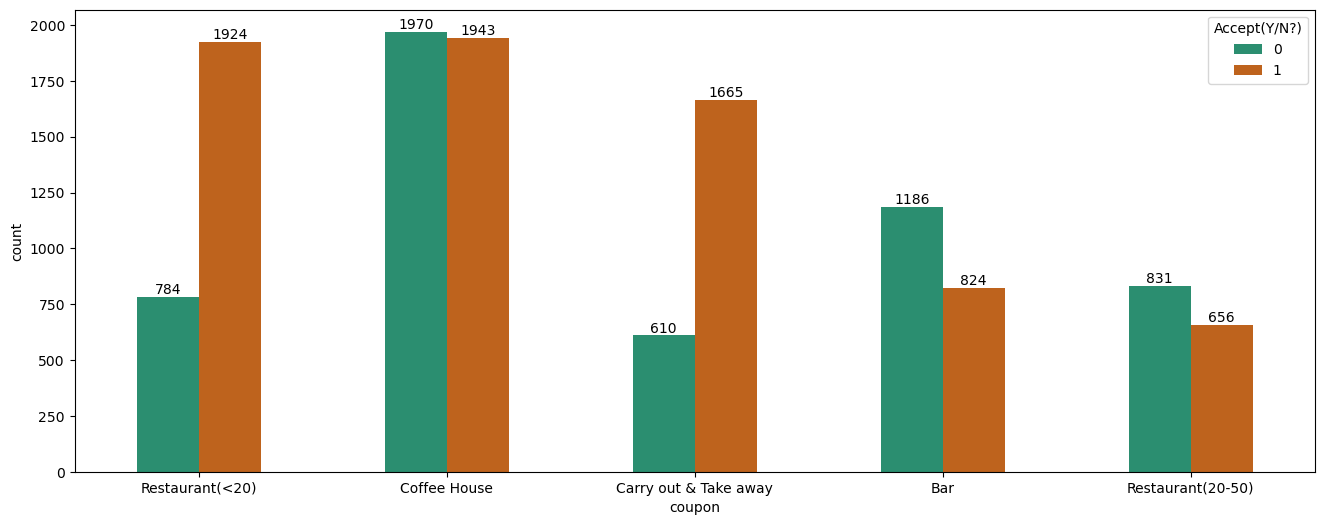

______________________________________________________________________________________________________________________________________________________
expiration
1d    6938
2h    5455
Name: count, dtype: int64




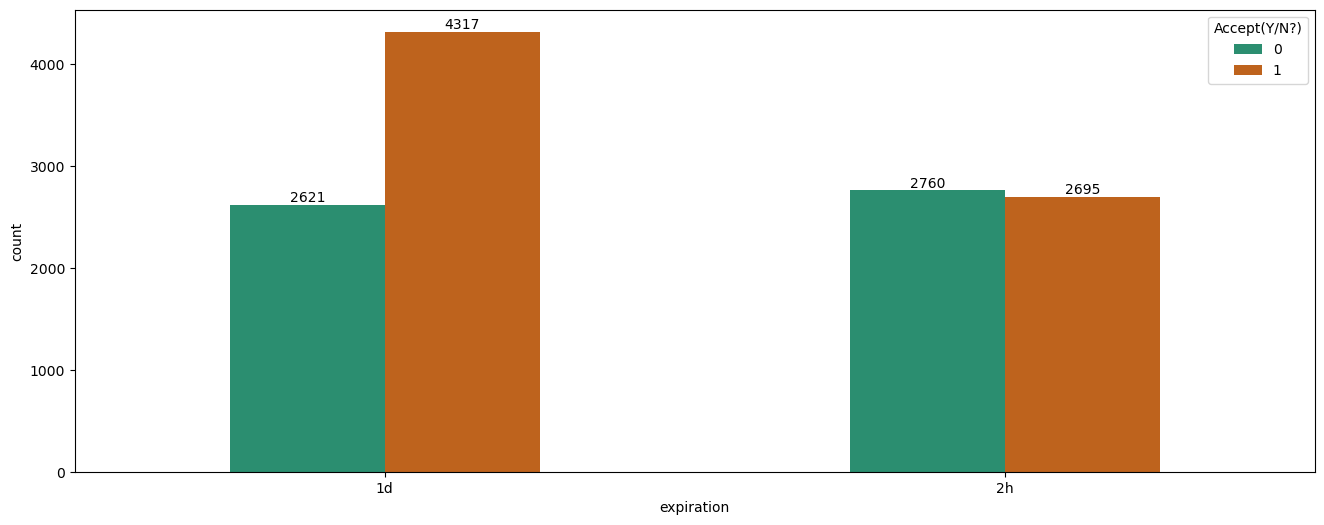

______________________________________________________________________________________________________________________________________________________
gender
Female    6355
Male      6038
Name: count, dtype: int64




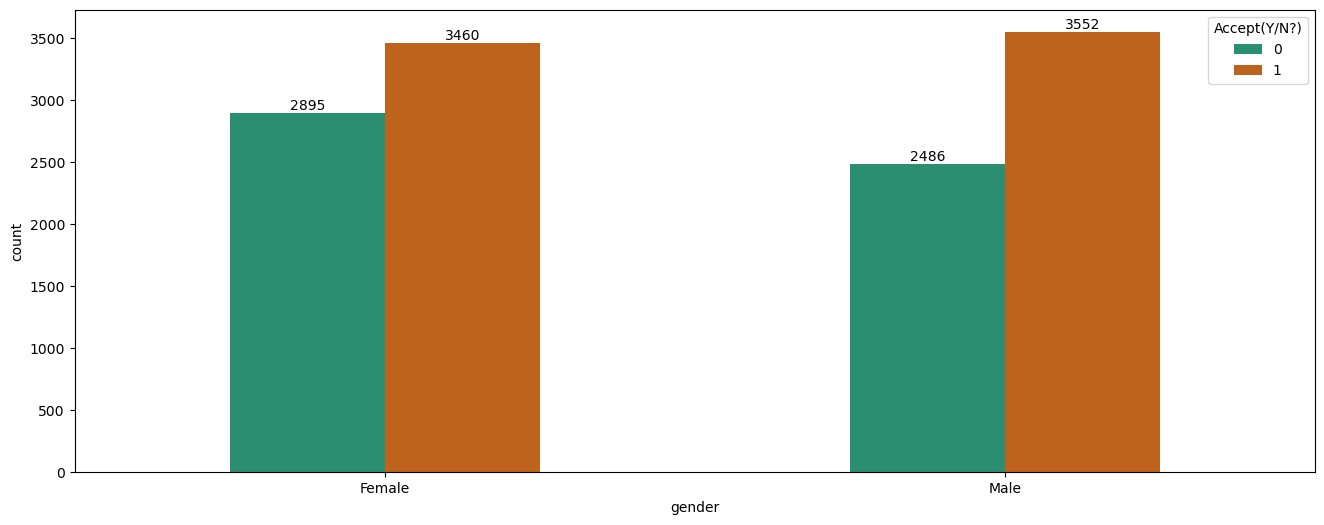

______________________________________________________________________________________________________________________________________________________
age
21         2598
26         2486
31         1984
50plus     1756
36         1293
41         1079
46          660
below21     537
Name: count, dtype: int64




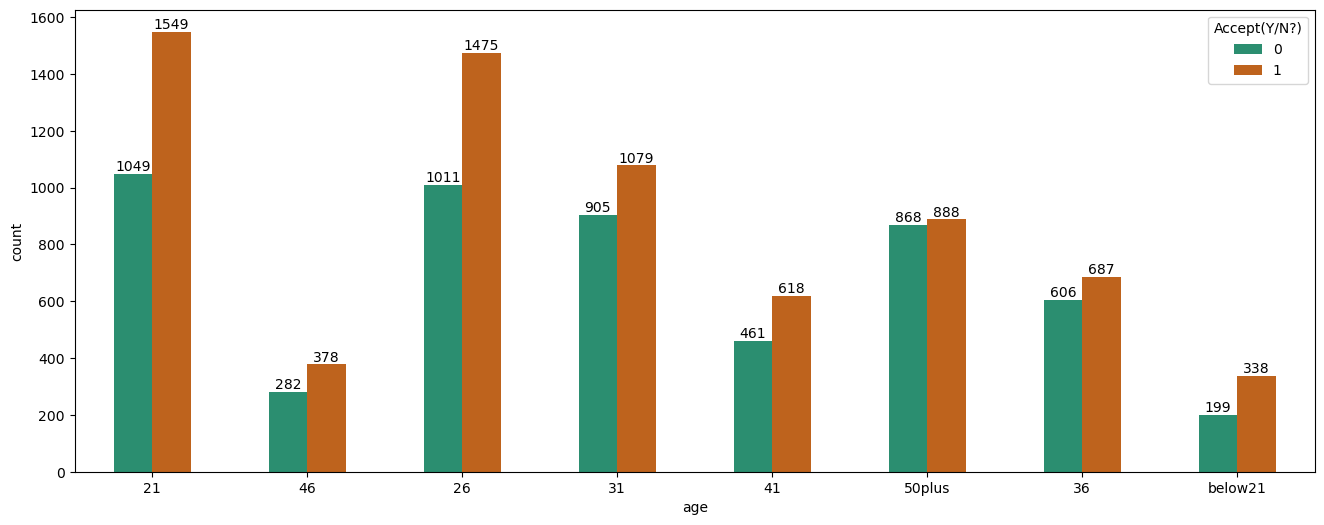

______________________________________________________________________________________________________________________________________________________
maritalStatus
Married partner      4994
Single               4610
Unmarried partner    2155
Divorced              505
Widowed               129
Name: count, dtype: int64




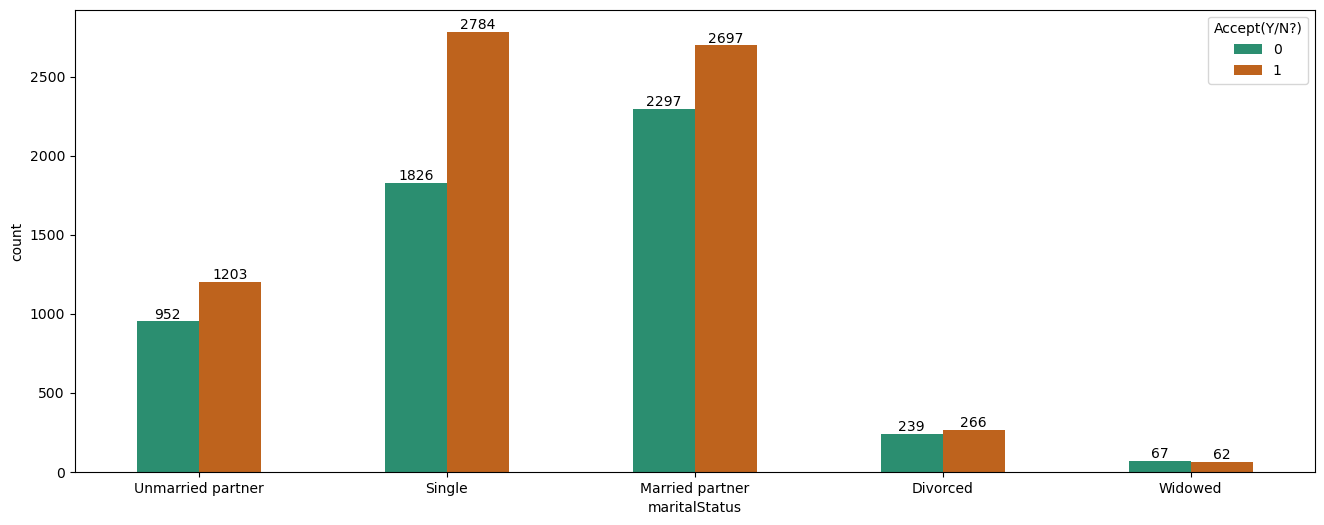

______________________________________________________________________________________________________________________________________________________
has_children
0    7243
1    5150
Name: count, dtype: int64




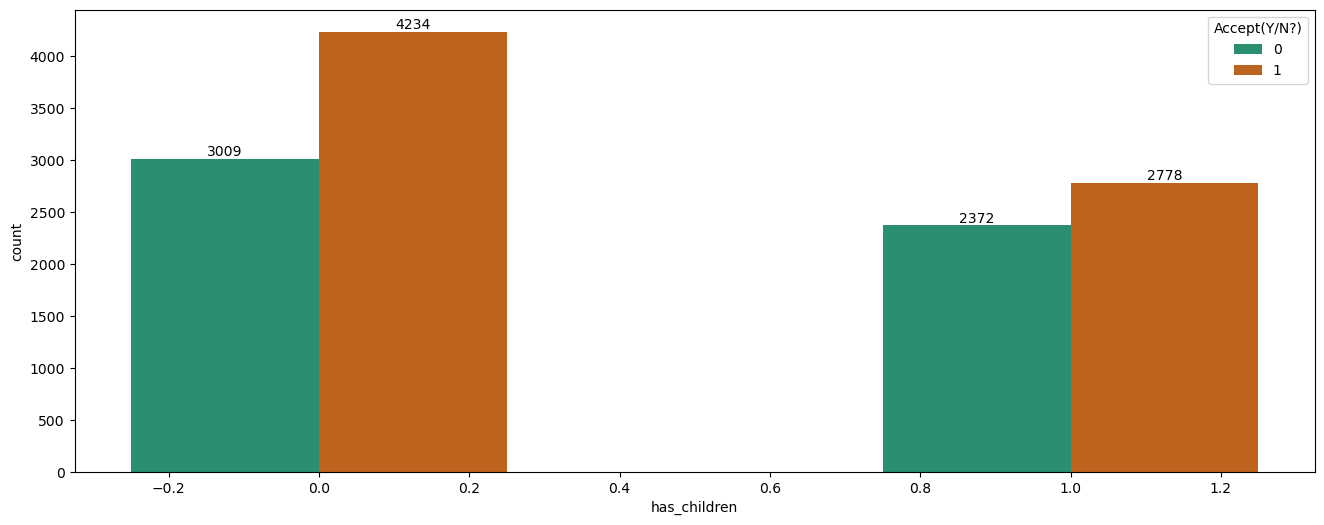

______________________________________________________________________________________________________________________________________________________
education
Some college - no degree                  4260
Bachelors degree                          4247
Graduate degree (Masters or Doctorate)    1793
Associates degree                         1126
High School Graduate                       880
Some High School                            87
Name: count, dtype: int64




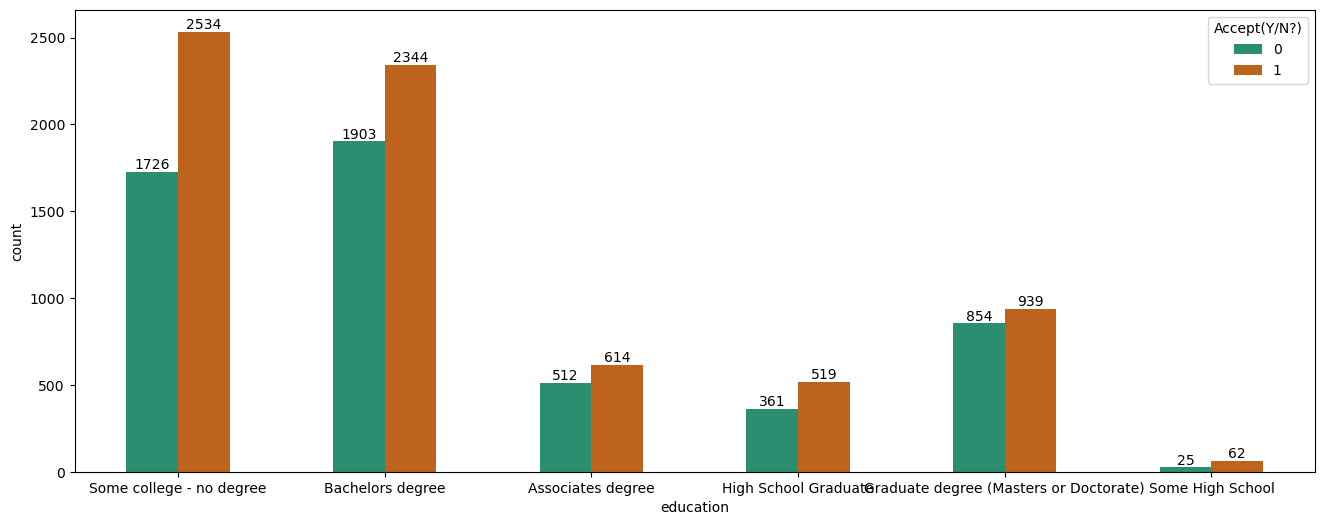

______________________________________________________________________________________________________________________________________________________
occupation
Unemployed                                   1828
Student                                      1550
Computer & Mathematical                      1360
Sales & Related                              1066
Education&Training&Library                    921
Management                                    806
Office & Administrative Support               631
Arts Design Entertainment Sports & Media      617
Business & Financial                          536
Retired                                       489
Food Preparation & Serving Related            293
Healthcare Support                            237
Healthcare Practitioners & Technical          237
Community & Social Services                   236
Legal                                         218
Transportation & Material Moving              214
Architecture & Engineering            

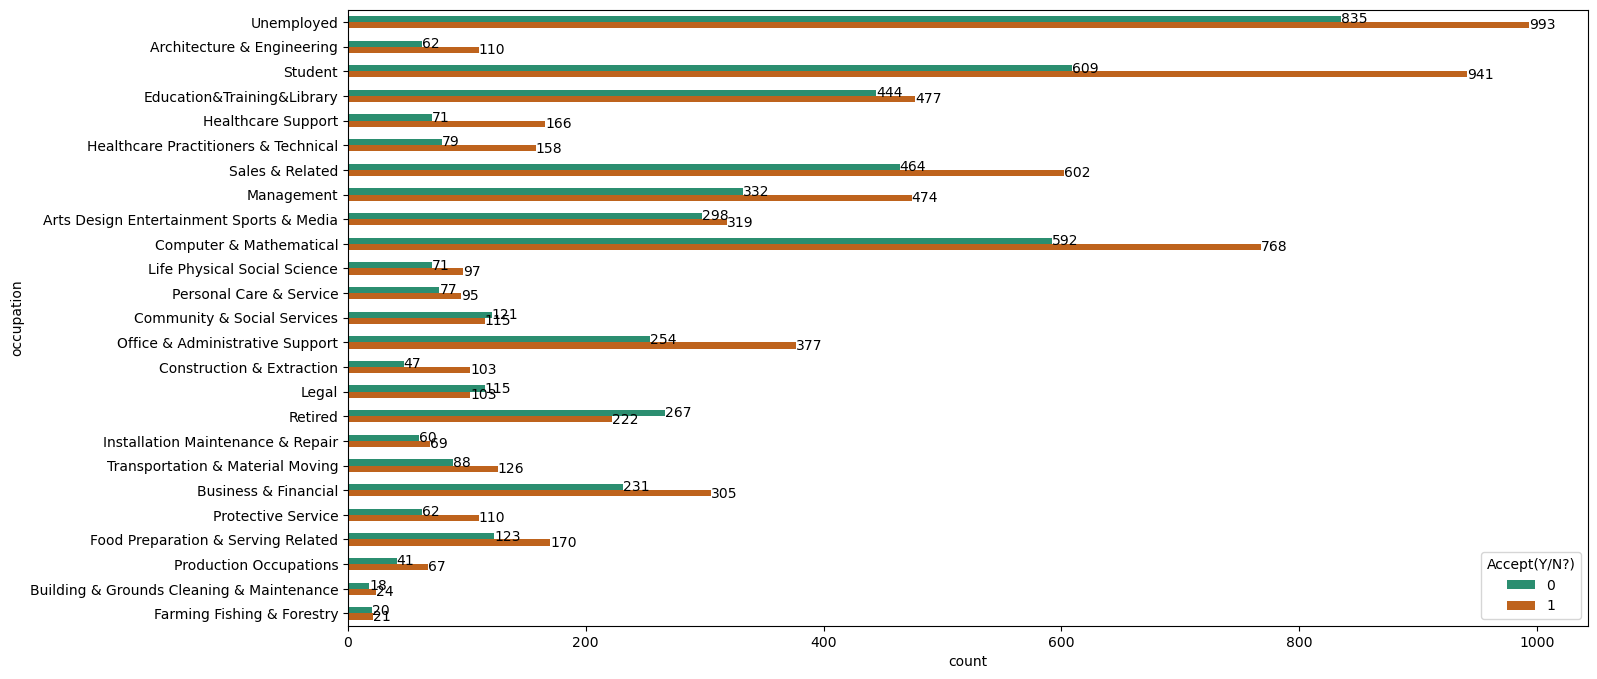

______________________________________________________________________________________________________________________________________________________
income
$25000 - $37499     1972
$12500 - $24999     1795
$37500 - $49999     1760
$100000 or More     1688
$50000 - $62499     1624
Less than $12500    1013
$87500 - $99999      865
$75000 - $87499      844
$62500 - $74999      832
Name: count, dtype: int64




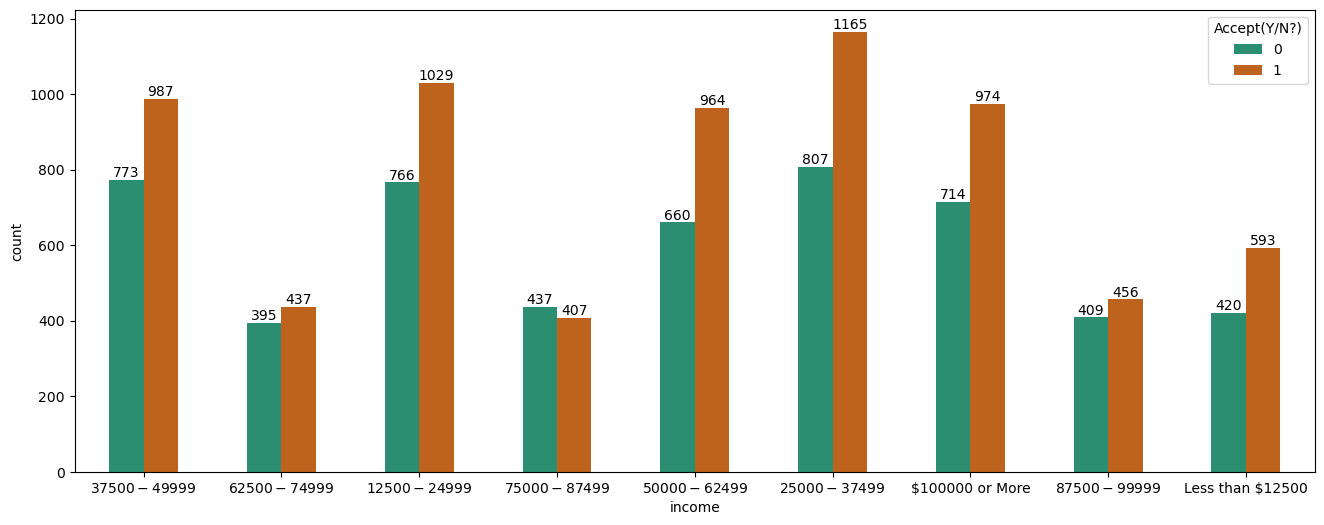

______________________________________________________________________________________________________________________________________________________
Bar
never    5195
less1    3383
1~3      2432
4~8      1045
gt8       338
Name: count, dtype: int64




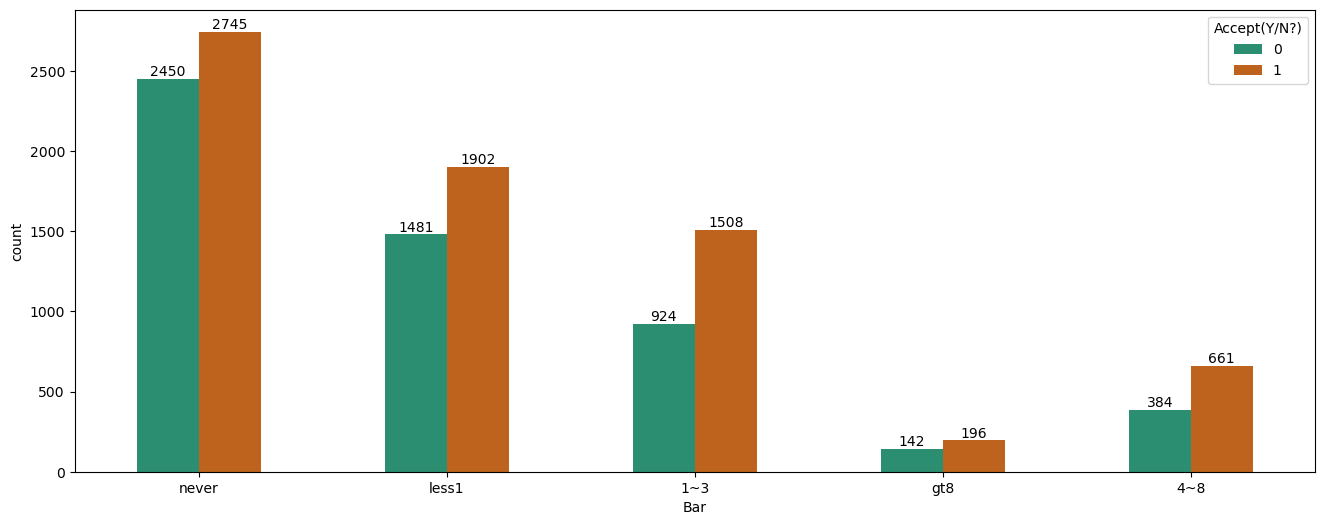

______________________________________________________________________________________________________________________________________________________
CoffeeHouse
less1    3525
1~3      3138
never    2895
4~8      1752
gt8      1083
Name: count, dtype: int64




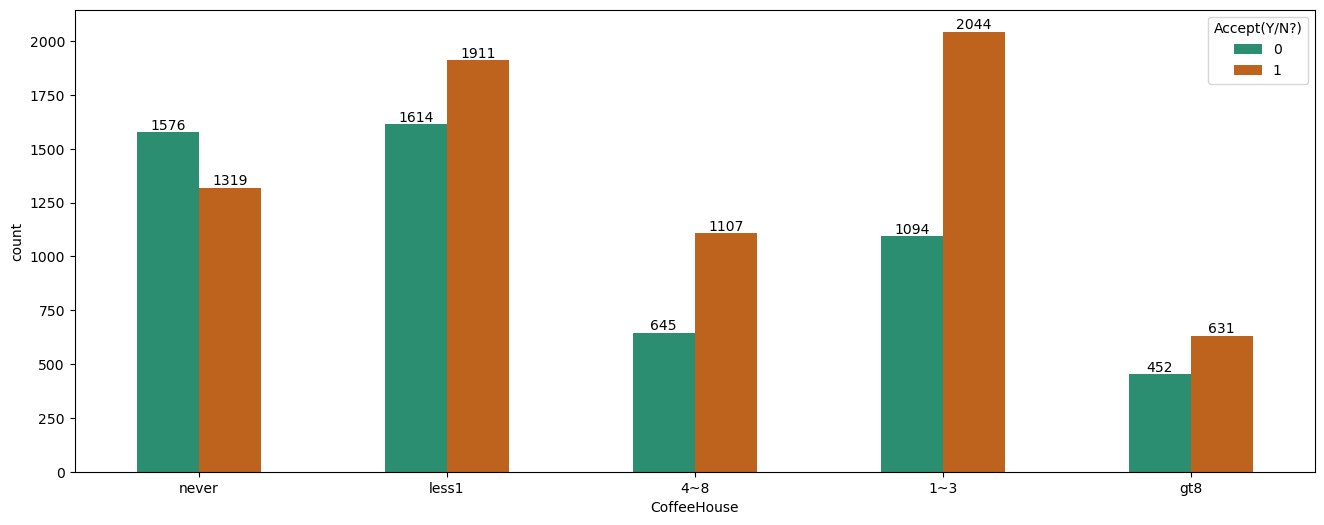

______________________________________________________________________________________________________________________________________________________
CarryAway
1~3      4719
4~8      4171
less1    1819
gt8      1535
never     149
Name: count, dtype: int64




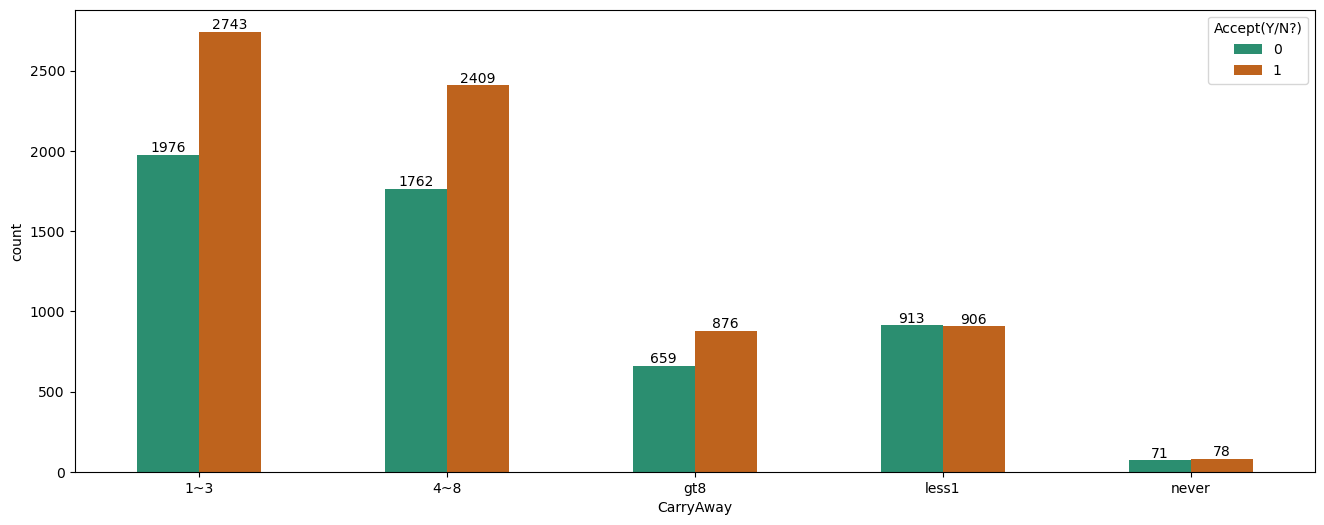

______________________________________________________________________________________________________________________________________________________
RestaurantLessThan20
1~3      5397
4~8      3493
less1    2034
gt8      1253
never     216
Name: count, dtype: int64




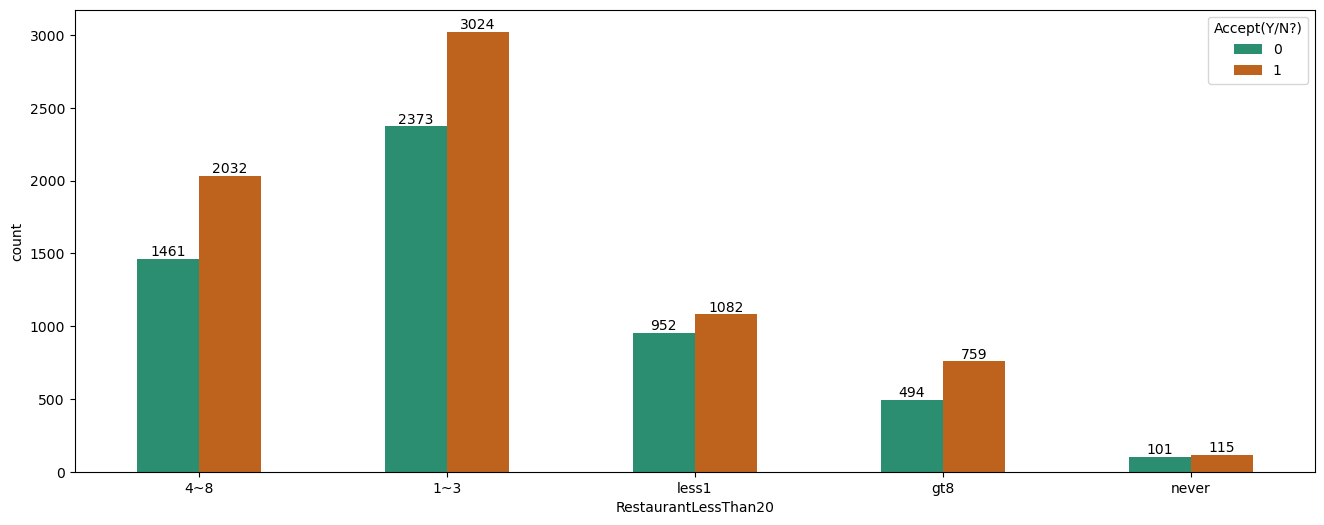

______________________________________________________________________________________________________________________________________________________
Restaurant20To50
less1    6134
1~3      3204
never    2083
4~8       718
gt8       254
Name: count, dtype: int64




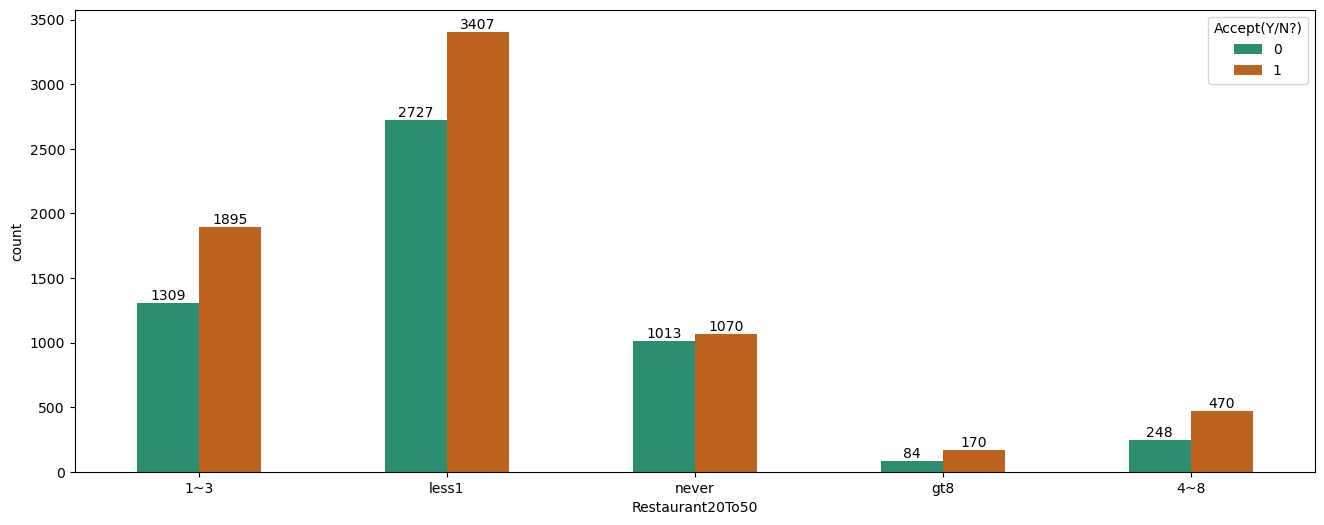

______________________________________________________________________________________________________________________________________________________
toCoupon_GEQ15min
1    6985
0    5408
Name: count, dtype: int64




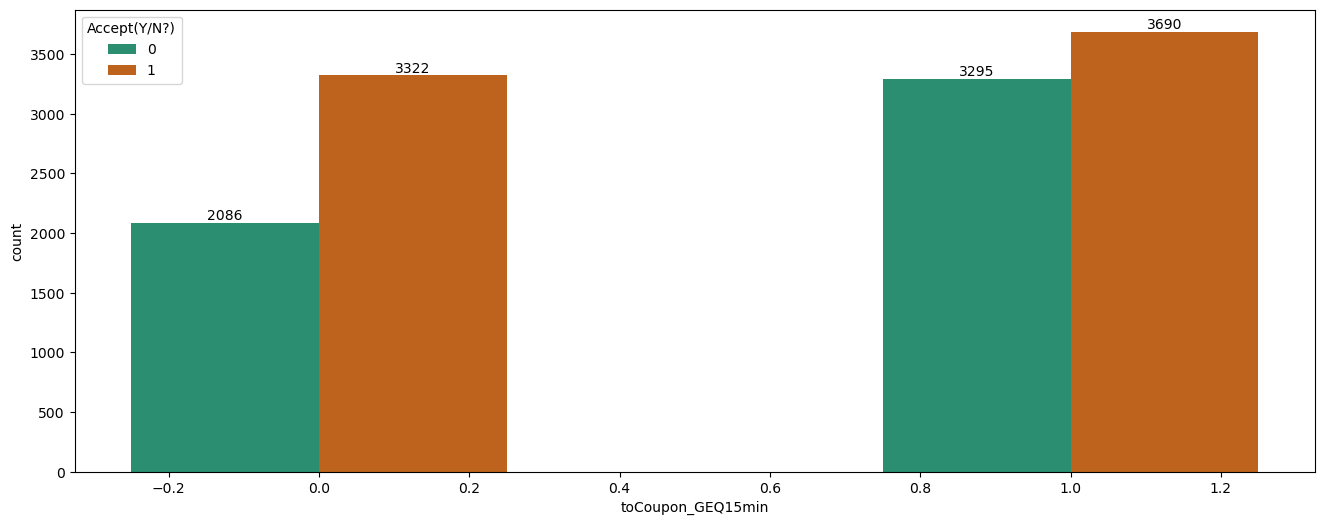

______________________________________________________________________________________________________________________________________________________
toCoupon_GEQ25min
0    10930
1     1463
Name: count, dtype: int64




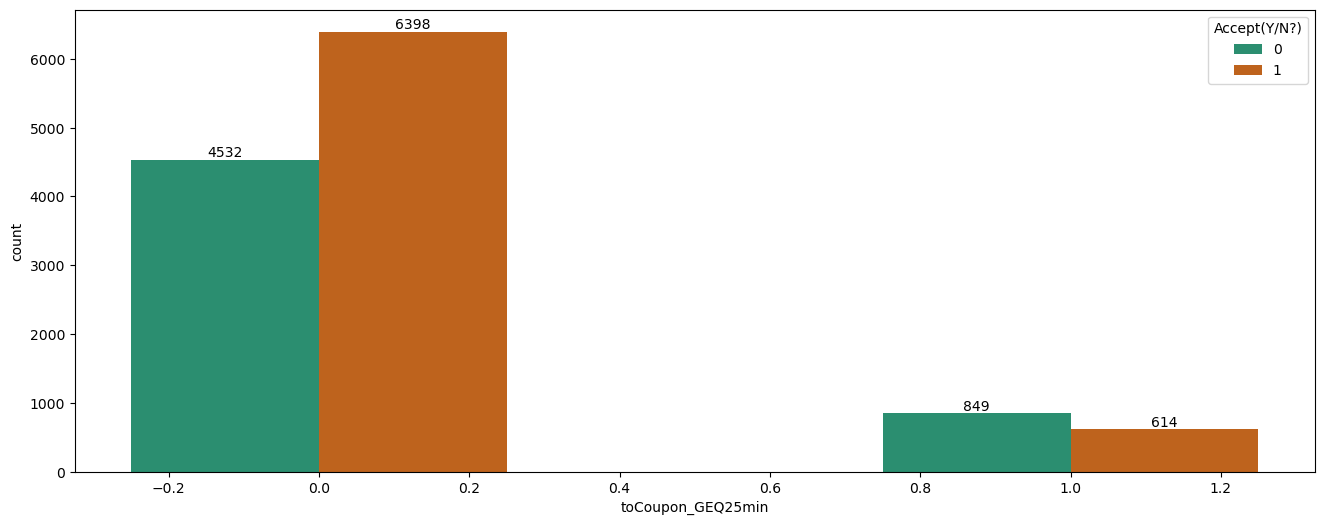

______________________________________________________________________________________________________________________________________________________
direction_same
0    9744
1    2649
Name: count, dtype: int64




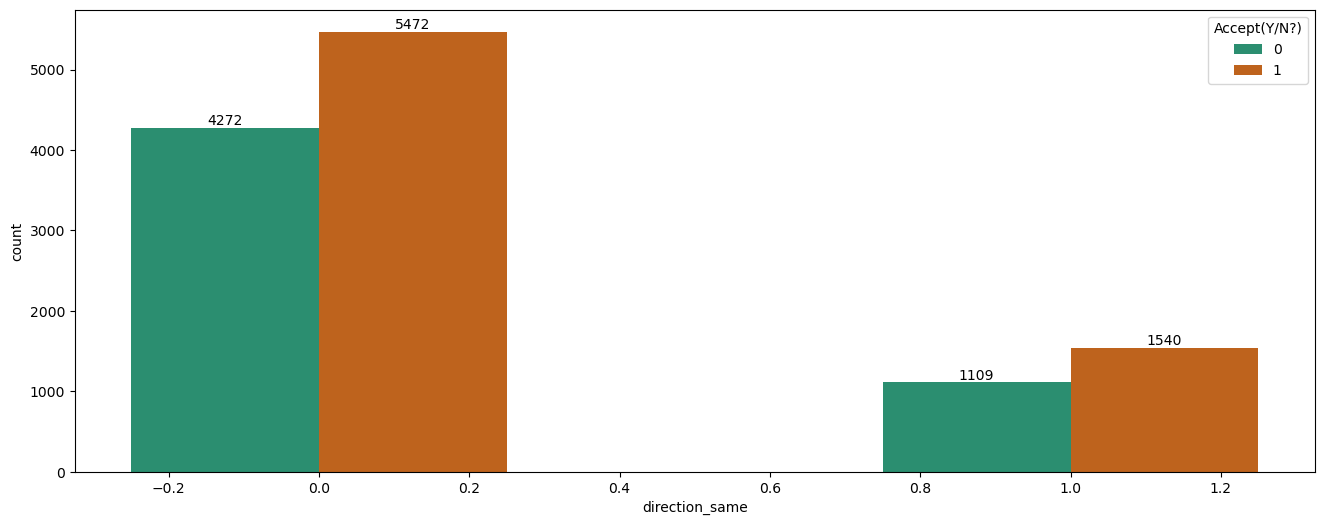

______________________________________________________________________________________________________________________________________________________
direction_opp
1    9744
0    2649
Name: count, dtype: int64




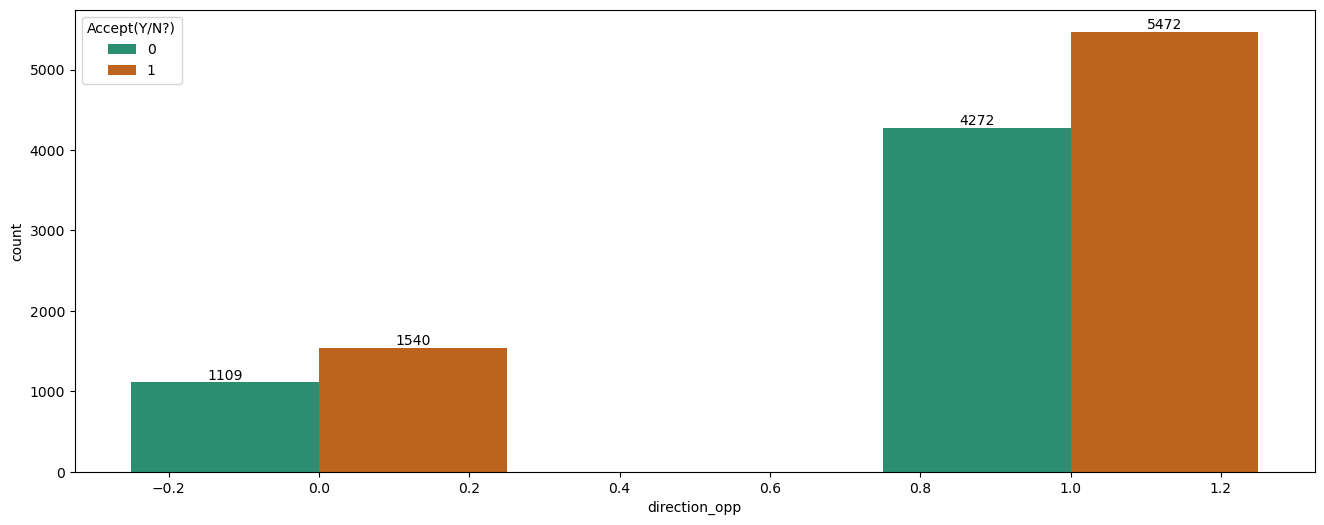

______________________________________________________________________________________________________________________________________________________
Accept(Y/N?)
1    7012
0    5381
Name: count, dtype: int64




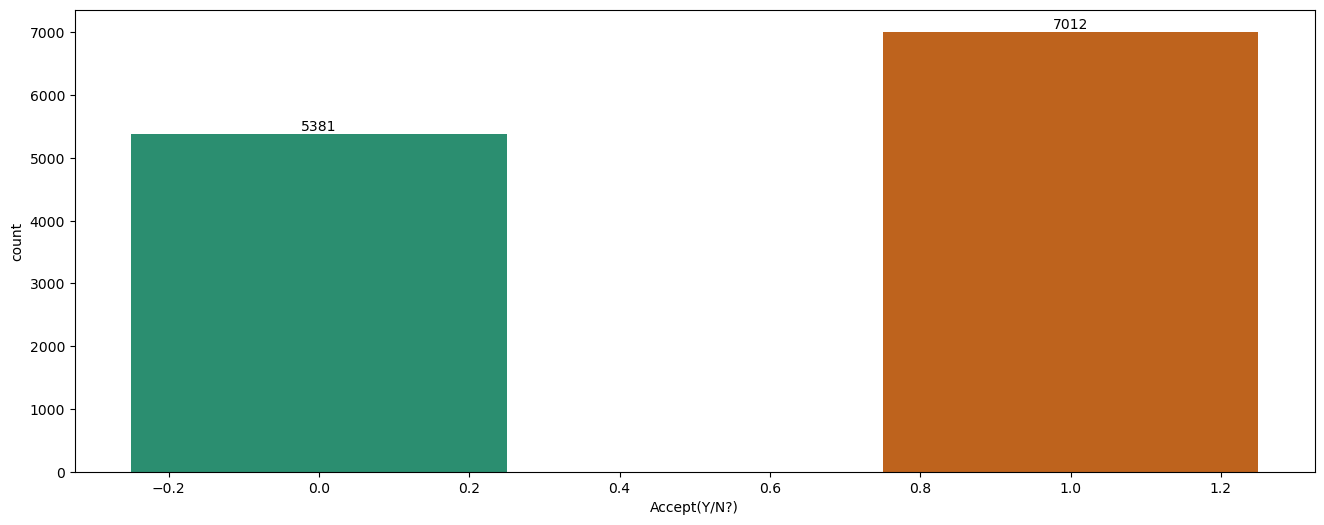

______________________________________________________________________________________________________________________________________________________


In [288]:
for col in df.columns:
    if col != 'occupation':
        print(df[col].value_counts())
        print()
        plt.figure(figsize = (16,6))
        ax = sns.countplot(x = col , hue='Accept(Y/N?)', data = df, native_scale= True, palette= 'Dark2', width = 0.5)
        for container in ax.containers:
            ax.bar_label(container)
        print()
        plt.show()
        print('_______________'*10)
    else:
        print(df[col].value_counts())
        print()
        plt.figure(figsize = (16,8))
        ax = sns.countplot(y = col , hue='Accept(Y/N?)', data = df, native_scale= True, palette= 'Dark2', width = 0.5)
        for container in ax.containers:
            ax.bar_label(container)
        print()
        plt.show()
        print('_______________'*10)

### Coupon acceptance pattern for various features

In [31]:
def coupon_acceptance_pattern(col):

    df1 = pd.DataFrame(df.groupby(col)['Accept(Y/N?)'].count())
    df1['Accepted'] = df[df['Accept(Y/N?)'] == 1].groupby(col)['Accept(Y/N?)'].count()
    df1["Rejected"] = df[df['Accept(Y/N?)'] == 0].groupby(col)['Accept(Y/N?)'].count()
    df1["Acceptance %ge"] = (df1['Accepted']/(df1['Accept(Y/N?)'])) * 100
    df1["Rejection %ge"] = (df1['Rejected'] / (df1['Accept(Y/N?)'])) * 100

    return df1.iloc[:,1:]


In [32]:
coupon_acceptance_pattern('destination')

,Accepted,Rejected,Acceptance %ge,Rejection %ge
destination,,,,
Home,1594,1567,50.427080,49.572920
No Urgent Place,3865,2253,63.174240,36.825760
Work,1553,1561,49.871548,50.128452


In [33]:

for col in df.columns:
  if col != 'Accept(Y/N?)':
    print(f"The coupon acceptance pattern of '{col}' feature is shown below.")
    print()
    display(coupon_acceptance_pattern(col))
    print()

The coupon acceptance pattern of 'destination' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
destination,,,,
Home,1594,1567,50.427080,49.572920
No Urgent Place,3865,2253,63.174240,36.825760
Work,1553,1561,49.871548,50.128452



The coupon acceptance pattern of 'passanger' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
passanger,,,,
Alone,3760,3418,52.382279,47.617721
Friend(s),2127,1039,67.182565,32.817435
Kid(s),491,490,50.050968,49.949032
Partner,634,434,59.363296,40.636704



The coupon acceptance pattern of 'weather' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
weather,,,,
Rainy,557,645,46.339434,53.660566
Snowy,605,724,45.522950,54.477050
Sunny,5850,4012,59.318597,40.681403



The coupon acceptance pattern of 'temperature' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
temperature,,,,
30,1171,1066,52.346893,47.653107
55,2055,1773,53.683386,46.316614
80,3786,2542,59.829330,40.170670



The coupon acceptance pattern of 'coupon' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
coupon,,,,
Bar,824,1186,40.995025,59.004975
Carry out & Take away,1665,610,73.186813,26.813187
Coffee House,1943,1970,49.654996,50.345004
Restaurant(20-50),656,831,44.115669,55.884331
Restaurant(<20),1924,784,71.048744,28.951256



The coupon acceptance pattern of 'expiration' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
expiration,,,,
1d,4317,2621,62.222543,37.777457
2h,2695,2760,49.404216,50.595784



The coupon acceptance pattern of 'gender' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
gender,,,,
Female,3460,2895,54.445319,45.554681
Male,3552,2486,58.827426,41.172574



The coupon acceptance pattern of 'age' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
age,,,,
21,1549,1049,59.622787,40.377213
26,1475,1011,59.332261,40.667739
31,1079,905,54.385081,45.614919
36,687,606,53.132251,46.867749
41,618,461,57.275255,42.724745
46,378,282,57.272727,42.727273
50plus,888,868,50.569476,49.430524
below21,338,199,62.942272,37.057728



The coupon acceptance pattern of 'maritalStatus' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
maritalStatus,,,,
Divorced,266,239,52.673267,47.326733
Married partner,2697,2297,54.004806,45.995194
Single,2784,1826,60.390456,39.609544
Unmarried partner,1203,952,55.823666,44.176334
Widowed,62,67,48.062016,51.937984



The coupon acceptance pattern of 'has_children' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
has_children,,,,
0,4234,3009,58.456441,41.543559
1,2778,2372,53.941748,46.058252



The coupon acceptance pattern of 'education' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
education,,,,
Associates degree,614,512,54.529307,45.470693
Bachelors degree,2344,1903,55.191900,44.808100
Graduate degree (Masters or Doctorate),939,854,52.370329,47.629671
High School Graduate,519,361,58.977273,41.022727
Some High School,62,25,71.264368,28.735632
Some college - no degree,2534,1726,59.483568,40.516432



The coupon acceptance pattern of 'occupation' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
occupation,,,,
Architecture & Engineering,110,62,63.953488,36.046512
Arts Design Entertainment Sports & Media,319,298,51.701783,48.298217
Building & Grounds Cleaning & Maintenance,24,18,57.142857,42.857143
Business & Financial,305,231,56.902985,43.097015
Community & Social Services,115,121,48.728814,51.271186
Computer & Mathematical,768,592,56.470588,43.529412
Construction & Extraction,103,47,68.666667,31.333333
Education&Training&Library,477,444,51.791531,48.208469
Farming Fishing & Forestry,21,20,51.219512,48.780488



The coupon acceptance pattern of 'income' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
income,,,,
$100000 or More,974,714,57.701422,42.298578
$12500 - $24999,1029,766,57.325905,42.674095
$25000 - $37499,1165,807,59.077079,40.922921
$37500 - $49999,987,773,56.079545,43.920455
$50000 - $62499,964,660,59.359606,40.640394
$62500 - $74999,437,395,52.524038,47.475962
$75000 - $87499,407,437,48.222749,51.777251
$87500 - $99999,456,409,52.716763,47.283237
Less than $12500,593,420,58.538993,41.461007



The coupon acceptance pattern of 'Bar' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
Bar,,,,
1~3,1508,924,62.006579,37.993421
4~8,661,384,63.253589,36.746411
gt8,196,142,57.988166,42.011834
less1,1902,1481,56.222288,43.777712
never,2745,2450,52.839269,47.160731



The coupon acceptance pattern of 'CoffeeHouse' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
CoffeeHouse,,,,
1~3,2044,1094,65.137030,34.862970
4~8,1107,645,63.184932,36.815068
gt8,631,452,58.264081,41.735919
less1,1911,1614,54.212766,45.787234
never,1319,1576,45.561313,54.438687



The coupon acceptance pattern of 'CarryAway' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
CarryAway,,,,
1~3,2743,1976,58.126722,41.873278
4~8,2409,1762,57.755934,42.244066
gt8,876,659,57.068404,42.931596
less1,906,913,49.807587,50.192413
never,78,71,52.348993,47.651007



The coupon acceptance pattern of 'RestaurantLessThan20' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
RestaurantLessThan20,,,,
1~3,3024,2373,56.031128,43.968872
4~8,2032,1461,58.173490,41.826510
gt8,759,494,60.574621,39.425379
less1,1082,952,53.195674,46.804326
never,115,101,53.240741,46.759259



The coupon acceptance pattern of 'Restaurant20To50' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
Restaurant20To50,,,,
1~3,1895,1309,59.144819,40.855181
4~8,470,248,65.459610,34.540390
gt8,170,84,66.929134,33.070866
less1,3407,2727,55.542876,44.457124
never,1070,1013,51.368219,48.631781



The coupon acceptance pattern of 'toCoupon_GEQ15min' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
toCoupon_GEQ15min,,,,
0,3322,2086,61.427515,38.572485
1,3690,3295,52.827487,47.172513



The coupon acceptance pattern of 'toCoupon_GEQ25min' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
toCoupon_GEQ25min,,,,
0,6398,4532,58.536139,41.463861
1,614,849,41.968558,58.031442



The coupon acceptance pattern of 'direction_same' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
direction_same,,,,
0,5472,4272,56.157635,43.842365
1,1540,1109,58.135145,41.864855



The coupon acceptance pattern of 'direction_opp' feature is shown below.



,Accepted,Rejected,Acceptance %ge,Rejection %ge
direction_opp,,,,
0,1540,1109,58.135145,41.864855
1,5472,4272,56.157635,43.842365


## Encoding/ Feature Engineering

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def encoding(df):
    df1 = df.copy()
    df1['destination'] = le.fit_transform(df1['destination'])
    df1['passanger'] = le.fit_transform(df1['passanger'])
    df1['weather'] = le.fit_transform(df1['weather'])
    df1['coupon'] = le.fit_transform(df1['coupon'])
    df1['expiration'] = le.fit_transform(df1['expiration'])
    df1['gender'] = le.fit_transform(df1['gender'])
    df1['age'] = le.fit_transform(df1['age'])
    df1['maritalStatus'] = le.fit_transform(df1['maritalStatus'])
    df1['education'] = le.fit_transform(df1['education'])
    df1['occupation'] = le.fit_transform(df1['occupation'])
    df1['income'] = le.fit_transform(df1['income'])
    df1['Bar'] = le.fit_transform(df1['Bar'])
    df1['CoffeeHouse'] = le.fit_transform(df1['CoffeeHouse'])
    df1['CarryAway'] = le.fit_transform(df1['CarryAway'])
    df1['RestaurantLessThan20'] = le.fit_transform(df1['RestaurantLessThan20'])
    df1['Restaurant20To50'] = le.fit_transform(df1['Restaurant20To50'])

    return df1

df_encoded = encoding(df)


In [36]:
df_encoded.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,1,0,2,55,4,0,0,0,3,1,...,4,4,0,1,0,0,0,0,1,1
1,1,1,2,80,2,1,0,0,3,1,...,4,4,0,1,0,0,0,0,1,0
2,1,1,2,80,1,1,0,0,3,1,...,4,4,0,1,0,1,0,0,1,1
3,1,1,2,80,2,1,0,0,3,1,...,4,4,0,1,0,1,0,0,1,0
4,1,1,2,80,2,0,0,0,3,1,...,4,4,0,1,0,1,0,0,1,0


In [37]:
df_encoded.describe()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12393.000000,12393.000000,12393.000000,12393.000000,12393.00000,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000,...,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000
mean,0.996208,0.672315,1.698782,63.252643,2.04906,0.440168,0.487211,2.601791,1.710240,0.415557,...,2.634552,2.103849,1.072702,1.046155,2.256112,0.563625,0.118051,0.213750,0.786250,0.565803
std,0.711590,0.946447,0.636002,19.075396,1.35059,0.496427,0.499857,2.227025,0.835215,0.492838,...,1.554526,1.537023,1.093052,1.161006,1.481190,0.495955,0.322681,0.409969,0.409969,0.495671
min,0.000000,0.000000,0.000000,30.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,55.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,80.000000,2.00000,0.000000,0.000000,2.000000,2.000000,0.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,80.000000,3.00000,1.000000,1.000000,4.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,3.000000,2.000000,80.000000,4.00000,1.000000,1.000000,7.000000,4.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix

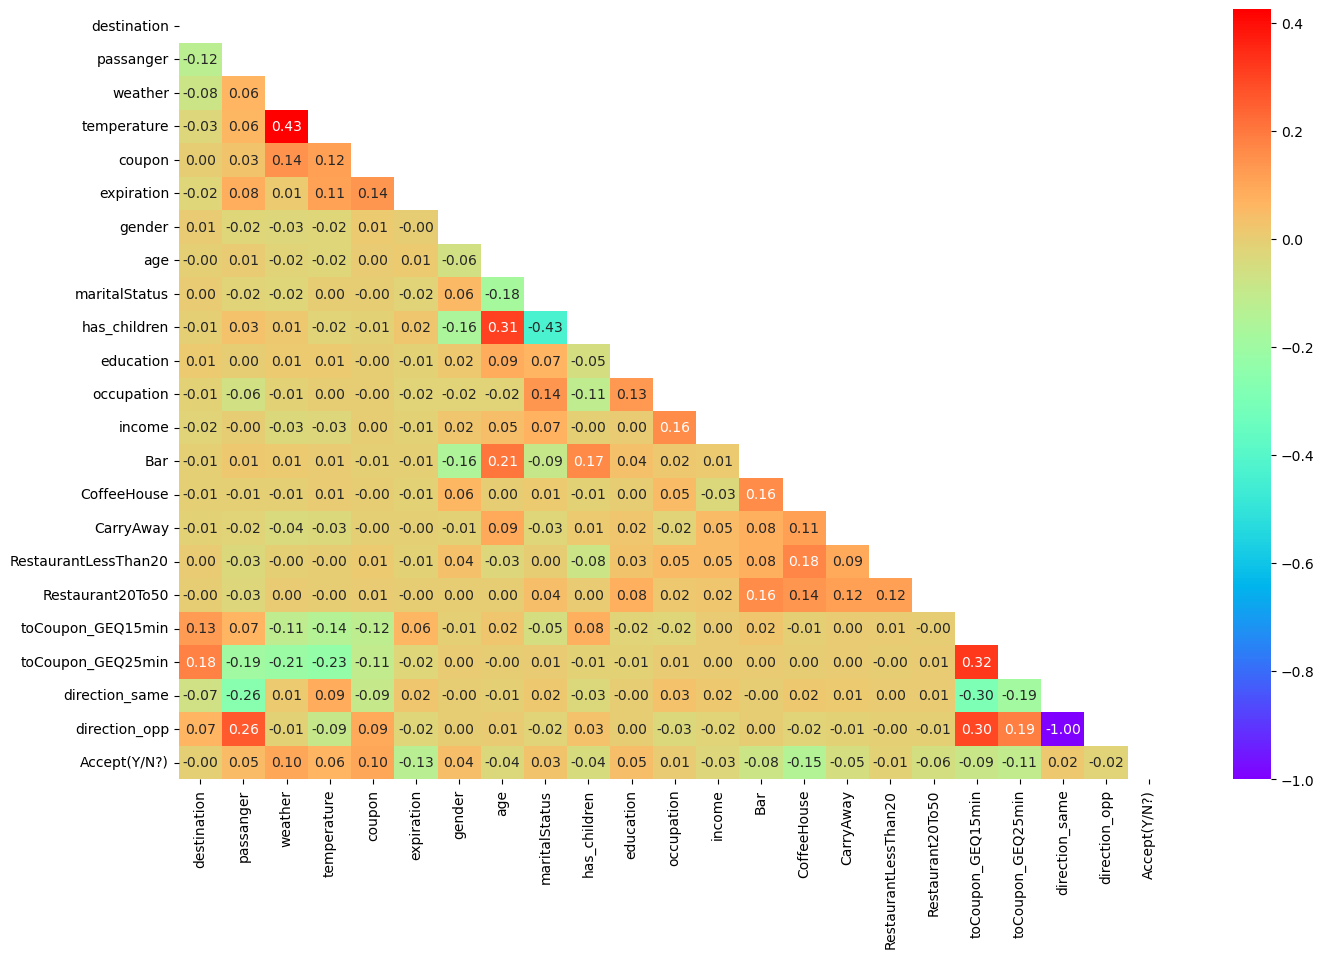

In [39]:
corr_matrix = df_encoded.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize = (16,10))
sns.heatmap(corr_matrix, fmt = '.2f', cmap = 'rainbow', annot= True, mask=mask)
plt.show()

In [40]:
#sns.pairplot(df_encoded, hue = 'Accept(Y/N?)')

### Split the dataset into x and y (dependent and independent variable)

In [42]:
x = df_encoded.drop('Accept(Y/N?)', axis = 1)
y = df_encoded['Accept(Y/N?)']

In [43]:
print(x.shape, y.shape, sep = '\n')

(12393, 22)
(12393,)


### Train test split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 43, stratify=y)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9294, 22)
(3099, 22)
(9294,)
(3099,)


### Scalling all the values into one scale

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [49]:
print(x_train_sc)
print("-----------------------------------------------------------------------------------")
print(x_test_sc)

[[ 0.01352396  0.35147485  0.47263589 ... -0.37128836 -0.5226382
   0.5226382 ]
 [-1.38305028 -0.70294971  0.47263589 ... -0.37128836  1.91336953
  -1.91336953]
 [ 1.4100982  -0.70294971  0.47263589 ... -0.37128836  1.91336953
  -1.91336953]
 ...
 [-1.38305028 -0.70294971  0.47263589 ...  2.69332442 -0.5226382
   0.5226382 ]
 [ 1.4100982  -0.70294971  0.47263589 ...  2.69332442 -0.5226382
   0.5226382 ]
 [ 0.01352396  0.35147485  0.47263589 ... -0.37128836 -0.5226382
   0.5226382 ]]
-----------------------------------------------------------------------------------
[[ 0.01352396 -0.70294971  0.47263589 ... -0.37128836 -0.5226382
   0.5226382 ]
 [-1.38305028 -0.70294971  0.47263589 ... -0.37128836 -0.5226382
   0.5226382 ]
 [ 1.4100982  -0.70294971  0.47263589 ... -0.37128836  1.91336953
  -1.91336953]
 ...
 [ 0.01352396  1.40589941  0.47263589 ... -0.37128836 -0.5226382
   0.5226382 ]
 [ 1.4100982  -0.70294971  0.47263589 ... -0.37128836 -0.5226382
   0.5226382 ]
 [ 0.01352396 -0.70294

## Logistic Regression Model building

In [51]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train_sc, y_train)

LogisticRegression()

In [52]:
y_pred_tr_logit = logit.predict(x_train_sc)
y_pred_te_logit = logit.predict(x_test_sc)

In [53]:
y_pred_tr_logit

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [54]:
y_pred_te_logit

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [56]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_logit, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_logit, y_test)}")

Training accuracy: 0.6265332472562943

Test accuracy: 0.633107454017425


In [57]:
print(classification_report(y_pred_tr_logit, y_train))
print()
print(classification_report(y_pred_te_logit, y_test))

              precision    recall  f1-score   support

           0       0.45      0.59      0.51      3048
           1       0.76      0.64      0.70      6246

    accuracy                           0.63      9294
   macro avg       0.61      0.62      0.60      9294
weighted avg       0.66      0.63      0.64      9294


              precision    recall  f1-score   support

           0       0.46      0.60      0.52      1037
           1       0.76      0.65      0.70      2062

    accuracy                           0.63      3099
   macro avg       0.61      0.63      0.61      3099
weighted avg       0.66      0.63      0.64      3099



In [58]:
print(confusion_matrix(y_pred_tr_logit, y_train))
print('_______________________________________________________')
print(confusion_matrix(y_pred_te_logit, y_test))

[[1806 1242]
 [2229 4017]]
_______________________________________________________
[[ 623  414]
 [ 723 1339]]


In [59]:
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Hyper parameter Tunning on logitstic model using GridSearchCV

In [87]:

from sklearn.model_selection import GridSearchCV

param_logit = {'penalty': ['l1','l2', 'elasticnet'], 'C':[1,2,3,4,5,6,8,10], 'max_iter':[100,200,300]}

logit_grid = GridSearchCV(logit, param_grid=param_logit, scoring= 'accuracy', cv = 4)
logit_grid.fit(x_train_sc, y_train)


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 8, 10],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [89]:
logit_grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [90]:
logit_grid.best_score_

0.6215847029962294

## Decision Tree Model

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_sc, y_train)

DecisionTreeClassifier()

In [93]:
y_pred_tr_dt = dt.predict(x_train_sc)
y_pred_te_dt = dt.predict(x_test_sc)

In [94]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_dt, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_dt, y_test)}")

Training accuracy: 0.9933290294813858

Test accuracy: 0.6760245240400129


In [95]:
dt.feature_importances_

array([0.0353991 , 0.05043108, 0.01798384, 0.04043459, 0.10330648,
       0.03567017, 0.02342931, 0.06999585, 0.03974097, 0.01618721,
       0.04650057, 0.09423292, 0.08647283, 0.07015731, 0.05922306,
       0.04699679, 0.03850626, 0.04405083, 0.0296557 , 0.0293904 ,
       0.01067634, 0.0115584 ])

In [96]:
# Print the feature importances with value

pd.DataFrame(index = x.columns, data = dt.feature_importances_, columns=["Feature Importance"])

,Feature Importance
destination,0.035399
passanger,0.050431
weather,0.017984
temperature,0.040435
coupon,0.103306
expiration,0.035670
gender,0.023429
age,0.069996
maritalStatus,0.039741
has_children,0.016187


In [97]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Hyper parameter tunning on Decision tree model using GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini','entropy'],'max_depth':[2,4,5,6,8,10,11,12,14,16,20,21,22]}

grid_dt = GridSearchCV(dt, param_grid=params, scoring = 'accuracy',cv = 4)
grid_dt.fit(x_train_sc, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 8, 10, 11, 12, 14, 16, 20,
                                       21, 22]},
             scoring='accuracy')

In [100]:
grid_dt.best_score_

0.6931348325470876

In [101]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 8}

#### After feature Importance and Hyper parameter tunning, again try to build a new decision tree model with best params.

In [103]:
dt1 = DecisionTreeClassifier(criterion = 'gini', max_depth =  8)
dt1.fit(x_train_sc, y_train)


DecisionTreeClassifier(max_depth=8)

In [104]:
y_pred_tr_dt1 = dt1.predict(x_train_sc)
y_pred_te_dt1 = dt1.predict(x_test_sc)

In [105]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_dt1, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_dt1, y_test)}")

Training accuracy: 0.7488702388637831

Test accuracy: 0.6908680219425621


## Random Forest model

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_sc, y_train)

RandomForestClassifier()

In [108]:
y_pred_tr_rf = rf.predict(x_train_sc)
y_pred_te_rf = rf.predict(x_test_sc)

In [109]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_rf, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_rf, y_test)}")

Training accuracy: 0.9933290294813858

Test accuracy: 0.7312036140690545


In [110]:
importance_df = pd.DataFrame(index = x.columns, data = rf.feature_importances_, columns=["Feature Importance"])
importance_df = importance_df.sort_values(by = 'Feature Importance', ascending = False)
importance_df

,Feature Importance
coupon,0.126814
occupation,0.088398
income,0.075998
age,0.065964
CoffeeHouse,0.061675
Bar,0.051825
education,0.050030
CarryAway,0.047231
RestaurantLessThan20,0.045994
passanger,0.044948


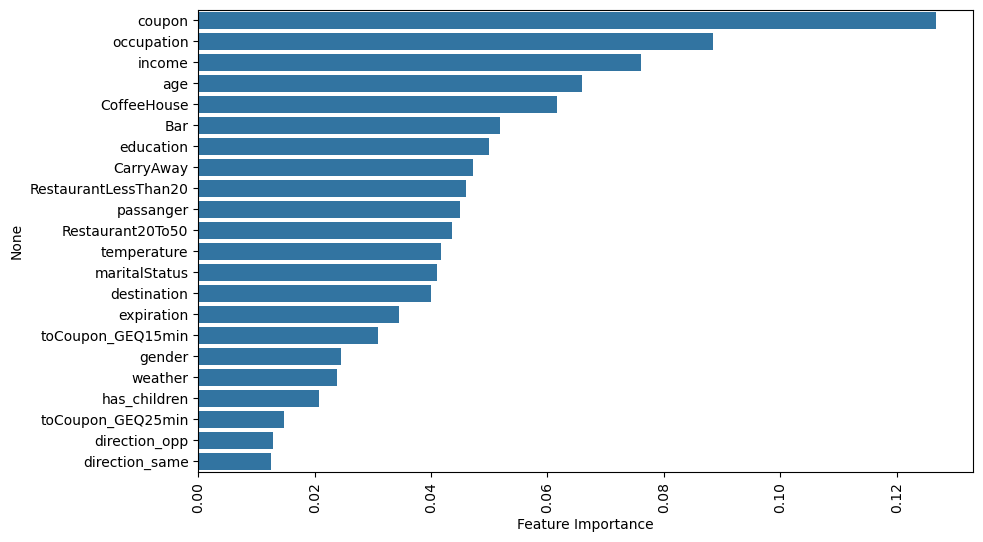

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(y = importance_df.index, x = 'Feature Importance', data = importance_df)
plt.xticks(rotation = 90)
plt.show()

#### OOB Rate

In [113]:
# # OOB Accuracy = model.oob_score_
# #OOB Error = (1 - model.oob_score_)

min_estimators = 1
max_estimators= 109

oob_error_rate = []

for i in range(min_estimators, max_estimators + 1):

    model = RandomForestClassifier(n_estimators= i, oob_score = True, random_state=42)
    model.fit(x_train_sc, y_train)

    oob_error_rate.append(1 - model.oob_score_)


#### Plot OOB error rate vs number of trees

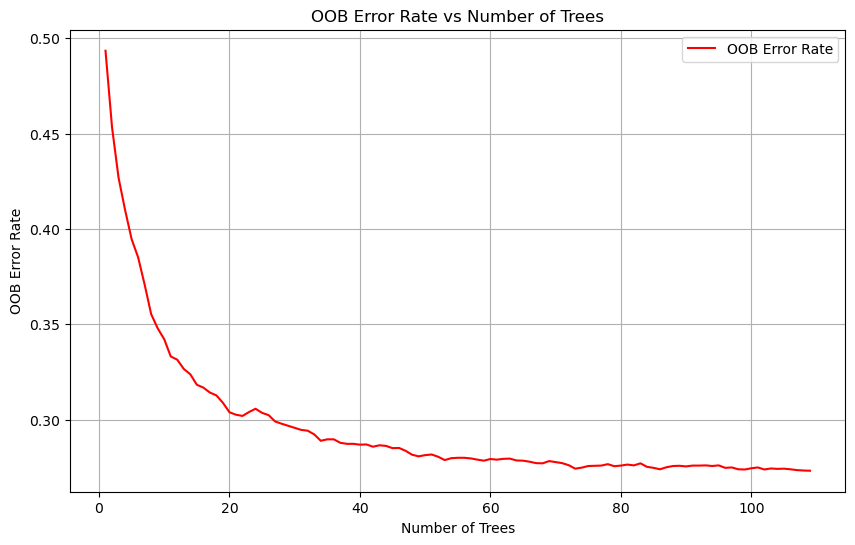

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(range(min_estimators, max_estimators + 1), oob_error_rate, color='r', label='OOB Error Rate')
plt.title('OOB Error Rate vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Rate')
plt.grid(True)
plt.legend()
plt.show()

## Hyper parameter tunning on Random Forest model using GridSearchCV

In [117]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
parameters = {'criterion': ['gini','entropy'], 'max_depth': [8,10,16,20], 'n_estimators': [50,60,70,80,90,100],'max_features': ['auto', 'sqrt', 'log2']}

In [119]:
grid_rf = GridSearchCV(rf, param_grid=parameters, scoring='accuracy', cv = 5)
grid_rf.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 16, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [120]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'log2',
 'n_estimators': 100}

In [121]:
grid_rf.best_score_

0.7368192211861997

### After hyper parameter tunning, again try to build a new random forest model with best params.

In [123]:
rf_tuned = RandomForestClassifier(criterion = 'gini', max_depth = 16, n_estimators = 100, max_features= 'sqrt', oob_score= False, warm_start= True)
rf_tuned.fit(x_train_sc, y_train)

RandomForestClassifier(max_depth=16, warm_start=True)

In [124]:
y_pred_tr_rf_tuned = rf_tuned.predict(x_train_sc)
y_pred_te_rf_tuned = rf_tuned.predict(x_test_sc)

In [125]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_rf_tuned, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_rf_tuned, y_test)}")

Training accuracy: 0.990101140520766

Test accuracy: 0.7363665698612456


## Bagging Model

In [127]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(x_train_sc, y_train)

BaggingClassifier()

In [128]:
y_pred_tr_bag = bag.predict(x_train_sc)
y_pred_te_bag = bag.predict(x_test_sc)

In [129]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_bag, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_bag, y_test)}")

Training accuracy: 0.9790187217559716

Test accuracy: 0.7186189093255889


## XGBoost Classifier Model

In [131]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
y_pred_tr_xg = xg.predict(x_train_sc)
y_pred_te_xg = xg.predict(x_test_sc)

In [133]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_xg, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_xg, y_test)}")

Training accuracy: 0.9256509576070583

Test accuracy: 0.7418522103904486


## Gradient Boosting Model

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train_sc, y_train)

GradientBoostingClassifier()

In [136]:
y_pred_tr_gb = gb.predict(x_train_sc)
y_pred_te_gb = gb.predict(x_test_sc)

In [137]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_gb, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_gb, y_test)}")

Training accuracy: 0.7386485904884872

Test accuracy: 0.717973539851565


## Ada Boost Model

In [139]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train_sc, y_train)

AdaBoostClassifier()

In [140]:
y_pred_tr_ada = ada.predict(x_train_sc)
y_pred_te_ada = ada.predict(x_test_sc)

In [141]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_ada, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_ada, y_test)}")

Training accuracy: 0.6831289003658274

Test accuracy: 0.680864795095192


## KNN Model

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [144]:
y_pred_tr_knn = knn.predict(x_train_sc)
y_pred_te_knn = knn.predict(x_test_sc)

In [145]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_knn, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_knn, y_test)}")

Training accuracy: 0.7765224876264256

Test accuracy: 0.6337528234914489


## SVM Model

In [147]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_sc, y_train)

SVC()

In [148]:
y_pred_tr_svm = svm.predict(x_train_sc)
y_pred_te_svm = svm.predict(x_test_sc)

In [149]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_svm, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_svm, y_test)}")

Training accuracy: 0.7594146761351409

Test accuracy: 0.6740884156179413


## Naive-Bayes Models

In [151]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#### Gaussian Naive bayes

In [153]:
gnb = GaussianNB()
gnb.fit(x_train_sc, y_train)

GaussianNB()

In [154]:
y_pred_tr_gnb = gnb.predict(x_train_sc)
y_pred_te_gnb = gnb.predict(x_test_sc)

In [155]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_gnb, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_gnb, y_test)}")

Training accuracy: 0.6082418764794492

Test accuracy: 0.6147144240077445


#### Bernoulli Naive bayes

In [157]:
bnb = BernoulliNB()
bnb.fit(x_train_sc, y_train)

BernoulliNB()

In [158]:
y_pred_tr_bnb = bnb.predict(x_train_sc)
y_pred_te_bnb = bnb.predict(x_test_sc)

In [159]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_bnb, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_bnb, y_test)}")

Training accuracy: 0.6231977619969873

Test accuracy: 0.6260083898031623


#### Convert the training and test accuracies of different algorithms used into one data frame.

In [161]:
algorithm_list = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging', 'XGBoost', 'Gradient Boosting',
                  'Ada Boost', 'K-Nearest Neibours', 'Support Vector Machine', 'Gaussian Naive bayes', 'Bernoulli Naive bayes']

training_list = [accuracy_score(y_train,y_pred_tr_logit), accuracy_score(y_train,y_pred_tr_dt1),
                 accuracy_score(y_train,y_pred_tr_rf), accuracy_score(y_train,y_pred_tr_bag), accuracy_score(y_train,y_pred_tr_xg),
                 accuracy_score(y_train,y_pred_tr_gb), accuracy_score(y_train,y_pred_tr_ada),
                 accuracy_score(y_train,y_pred_tr_knn), accuracy_score(y_train,y_pred_tr_svm),
                 accuracy_score(y_train,y_pred_tr_gnb), accuracy_score(y_train,y_pred_tr_bnb)]

test_list = [accuracy_score(y_test,y_pred_te_logit), accuracy_score(y_test,y_pred_te_dt1), accuracy_score(y_test,y_pred_te_rf),
             accuracy_score(y_test,y_pred_te_bag), accuracy_score(y_test,y_pred_te_xg), accuracy_score(y_test,y_pred_te_gb),
             accuracy_score(y_test,y_pred_te_ada), accuracy_score(y_test,y_pred_te_knn),accuracy_score(y_test,y_pred_te_svm),
             accuracy_score(y_test,y_pred_te_gnb), accuracy_score(y_test,y_pred_te_bnb)]

In [162]:
model_accuracy = pd.DataFrame({"Algorithm": algorithm_list,
                               "Training class accuracy in %ge" : [i * 100 for i in training_list],
                                "Test class accuracy in %ge" : [i * 100 for i in test_list]})

In [163]:
model_accuracy

,Algorithm,Training class accuracy in %ge,Test class accuracy in %ge
0,Logistic Regression,62.653325,63.310745
1,Decision Tree,74.887024,69.086802
2,Random Forest,99.332903,73.120361
3,Bagging,97.901872,71.861891
4,XGBoost,92.565096,74.185221
5,Gradient Boosting,73.864859,71.797354
6,Ada Boost,68.312890,68.086480
7,K-Nearest Neibours,77.652249,63.375282
8,Support Vector Machine,75.941468,67.408842
9,Gaussian Naive bayes,60.824188,61.471442


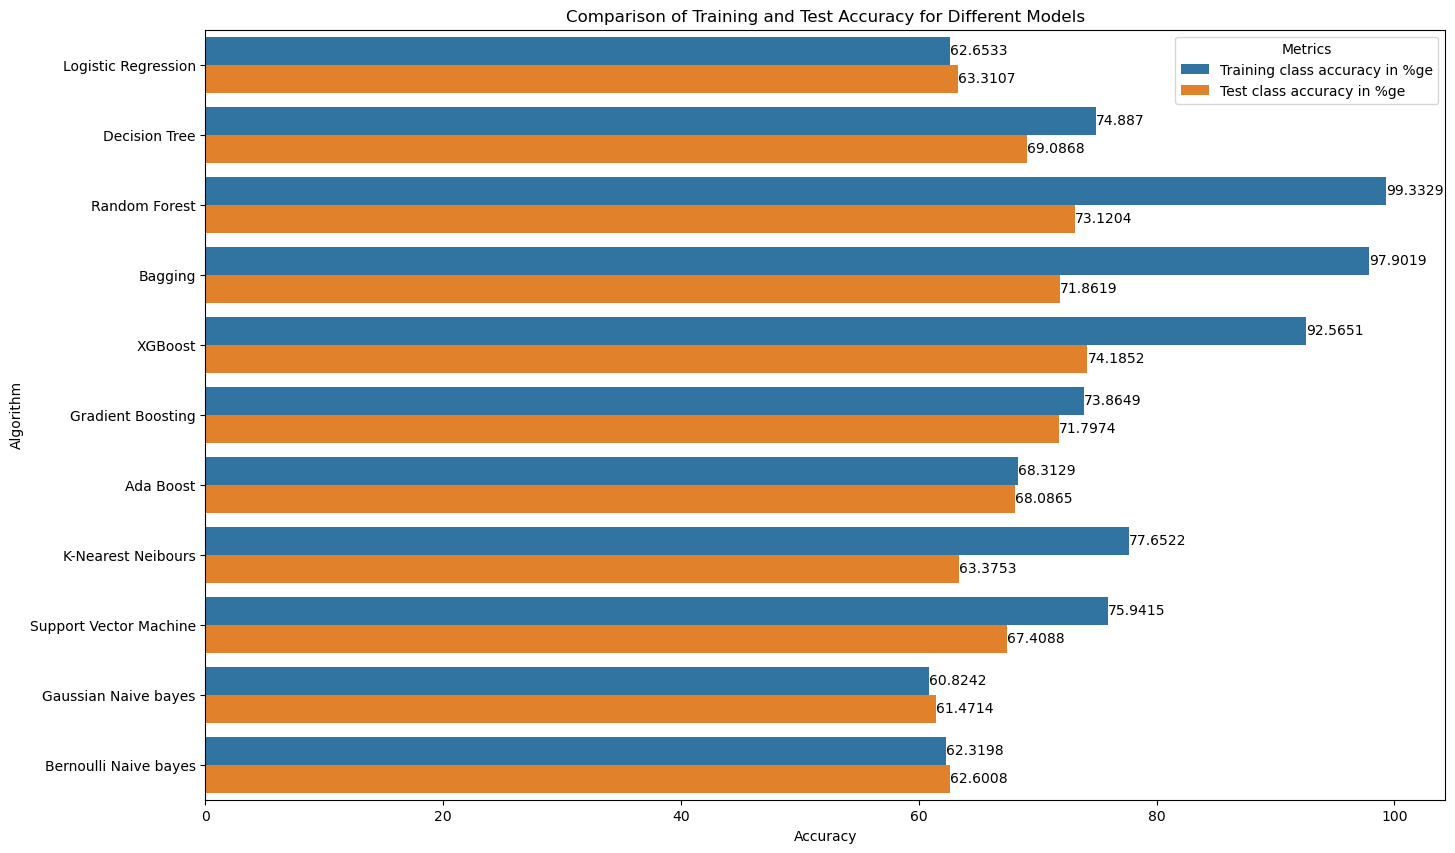

In [164]:
df_melted = model_accuracy.melt(id_vars='Algorithm', value_vars= ['Training class accuracy in %ge', 'Test class accuracy in %ge'], var_name= 'Metrics',
                               value_name= "Accuracy")

plt.figure(figsize = (16,10))
ax = sns.barplot(y = 'Algorithm', x = 'Accuracy', hue = 'Metrics', data = df_melted)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Comparison of Training and Test Accuracy for Different Models')
plt.show()



#### From the above plot we can see that Gradient Boosting model yeilds good result.

## Hyper parameter tunning on Gradient Boosting using GridSearchCV

In [168]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [169]:
parameters_gb = {'criterion': ['friedman_mse', 'squared_error'],'learning_rate': [0.05,0.1,0.2],
             'max_depth': [2,3,5,7], 'max_features':['auto', 'sqrt', 'log2']}

In [170]:
grid_gb = GridSearchCV(gb, param_grid= parameters_gb, scoring= 'accuracy', n_jobs = 3)
grid_gb.fit(x_train_sc, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [171]:
grid_gb.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'max_depth': 7,
 'max_features': 'auto'}

In [172]:
grid_gb.best_score_

0.7485472298670942

In [173]:
gb_tunned = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, max_depth= 7, max_features= 'log2')
gb_tunned.fit(x_train_sc, y_train)

GradientBoostingClassifier(max_depth=7, max_features='log2')

In [174]:
y_pred_tr_gb_tunned = gb_tunned.predict(x_train_sc)
y_pred_te_gb_tunned = gb_tunned.predict(x_test_sc)

In [175]:
print(f"Training accuracy: {accuracy_score(y_pred_tr_gb_tunned, y_train)}")
print()
print(f"Test accuracy: {accuracy_score(y_pred_te_gb_tunned, y_test)}")

Training accuracy: 0.886485904884872

Test accuracy: 0.7389480477573411


In [176]:
from sklearn.model_selection import cross_val_score

training = cross_val_score(gb_tunned, x_train_sc, y_train, cv = 10)
test = cross_val_score(gb_tunned, x_test_sc, y_test, cv = 10)

print("Training accuracy", training)
print()
print("Test accuracy", test)

Training accuracy [0.72688172 0.7516129  0.75483871 0.75053763 0.72981701 0.74273412
 0.74919268 0.75780409 0.73950484 0.7664155 ]

Test accuracy [0.72258065 0.67096774 0.67741935 0.70967742 0.65483871 0.71290323
 0.68387097 0.70322581 0.71612903 0.67961165]


In [177]:
print(training.mean())
print(test.mean())

0.7469339213167123
0.6931224553711243


In [178]:
print(training.max())
print(test.max())

0.7664155005382132
0.7225806451612903


### Confusion Matrix - Gradient Boosting model

In [180]:
cm_train = confusion_matrix(y_train, y_pred_tr_gb)
cm_test = confusion_matrix(y_test, y_pred_te_gb)

print("Confusion matrix of training \n\n", cm_train)
print("____________________________________________________________")
print()
print("Confusion matrix of test \n\n", cm_test)

Confusion matrix of training 

 [[2511 1524]
 [ 905 4354]]
____________________________________________________________

Confusion matrix of test 

 [[ 782  564]
 [ 310 1443]]


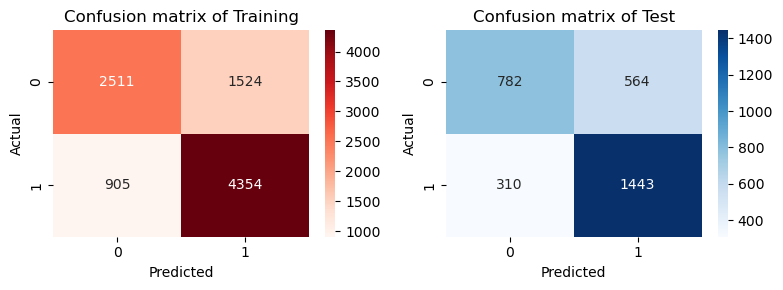

In [181]:
fig, axes = plt.subplots(1,2, figsize = (8,3))

sns.heatmap(cm_train, annot= True, cmap= 'Reds', fmt = 'd', ax = axes[0], )
axes[0].set_title("Confusion matrix of Training")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")



sns.heatmap(cm_test, annot= True, cmap= 'Blues', fmt = 'd', ax = axes[1])
axes[1].set_title("Confusion matrix of Test")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()

plt.show()

In [182]:
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

In [183]:
print("True Negative on training set:", tn_train)
print()
print("False positivr on training set:", fp_train)
print()
print("False Negative on training set:", fn_train)
print()
print("True positive on training set:", tp_train)
print("_____________________________________________")
print()
print("True Negative on test set:", tn_test)
print()
print("False positivr on test set:", fp_test)
print()
print("False Negative on test set:", fn_test)
print()
print("True positive on test set:", tp_test)

True Negative on training set: 2511

False positivr on training set: 1524

False Negative on training set: 905

True positive on training set: 4354
_____________________________________________

True Negative on test set: 782

False positivr on test set: 564

False Negative on test set: 310

True positive on test set: 1443


In [184]:
training_rf = cross_val_score(rf, x_train_sc, y_train, cv = 10)
test_rf = cross_val_score(rf, x_test_sc, y_test, cv = 10)

print("Training accuracy", training_rf)
print()
print("Test accuracy", test_rf)

Training accuracy [0.73010753 0.7311828  0.73548387 0.74086022 0.72766416 0.71797632
 0.73412271 0.73412271 0.70290635 0.74919268]

Test accuracy [0.71935484 0.67419355 0.67096774 0.71290323 0.60322581 0.71935484
 0.68709677 0.70322581 0.70322581 0.6828479 ]


In [185]:
print(training_rf.mean())
print(test_rf.mean())

0.7303619338634443
0.6876396283536904


In [186]:
training_xg = cross_val_score(xg, x_train_sc, y_train, cv = 10)
test_xg = cross_val_score(xg, x_test_sc, y_test, cv = 10)

print("Training accuracy", training_xg)
print()
print("Test accuracy", test_xg)

Training accuracy [0.72365591 0.75591398 0.74731183 0.73548387 0.72874058 0.75242196
 0.75995694 0.74703983 0.7416577  0.76533907]

Test accuracy [0.74193548 0.63548387 0.6483871  0.71612903 0.62580645 0.71290323
 0.69032258 0.70645161 0.69032258 0.68932039]


In [187]:
print(training_xg.mean())
print(test_xg.mean())

0.7457521673206245
0.6857062323833386


### From the above analysis, The Gradient Boosting Classifier yields good result compared to other Machine learning models.

### Classification report

In [190]:
print(classification_report(y_pred_tr_gb, y_train))
print()
print(classification_report(y_pred_te_gb, y_test))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      3416
           1       0.83      0.74      0.78      5878

    accuracy                           0.74      9294
   macro avg       0.73      0.74      0.73      9294
weighted avg       0.75      0.74      0.74      9294


              precision    recall  f1-score   support

           0       0.58      0.72      0.64      1092
           1       0.82      0.72      0.77      2007

    accuracy                           0.72      3099
   macro avg       0.70      0.72      0.70      3099
weighted avg       0.74      0.72      0.72      3099



### ROC AUC Curve

In [192]:
from sklearn.metrics import roc_curve, roc_auc_score

gb_roc_auc_score = roc_auc_score(y_test, y_pred_te_gb)

gb_roc_auc_score

0.7020704900705137

In [193]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_te_gb)

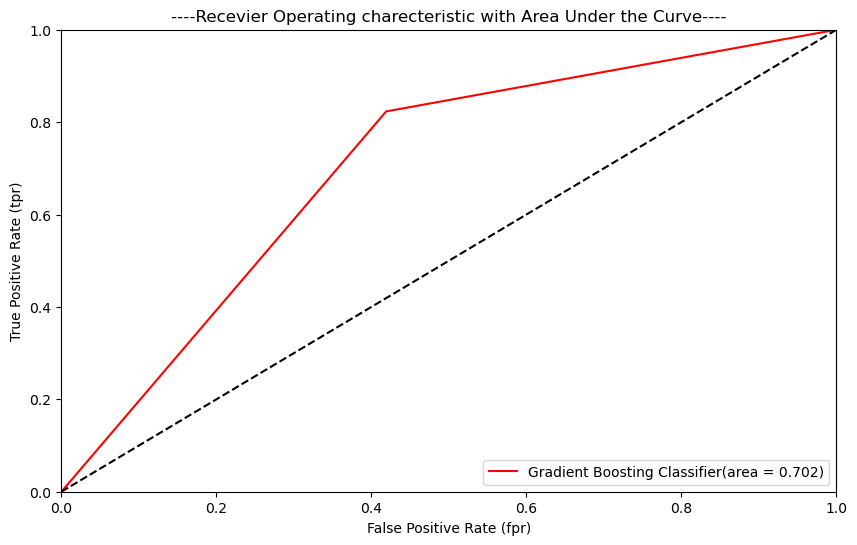

In [194]:
plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, label = 'Gradient Boosting Classifier(area = %0.3f)' %gb_roc_auc_score, color = 'red')
plt.plot([0,1] , [0,1] , 'k--')
#plotting against TPR and FPR
#TPR range is 0 to 1 i.e 0 to 100% hence [0,1]
#similarly for FPR
plt.xlim([0.0,1.0]) #---> 0 to 100 %
plt.ylim([0.0,1.0]) #---> 0 to 100 %
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()

## Conclusion

In this project, I developed a predictive model to forecast the coupon acceptance on E- commerce platforms. The gradient boosting model achieved an accuracy of 73.86% on training set and 71.79% accuracy on test set. These findings suggest that implementing such a model could significantly predict whether the person will accept/reject the coupons available. However, the model's performance was limited by the quality of the available data, which was incomplete and contained biases. Future work could focus on collecting more comprehensive and balanced datasets to improve model robustness. Additionally, exploring advanced algorithms like deep learning could further enhance predictive accuracy. This project has deepened my understanding of predictive analytics and reinforced the importance of data quality in machine learning applications.